Netfilx is an OTT platform which is now a days very popular across the globe. Though it is not the only available patform but it generates evven more revenue from its customer base. There are other platforms which has even bigger customer base but Netflix earns better than those.

There are two major reasons amongst many others.
1. It's strong recommendation algorithms
2. It's analytics team that workout on the dataset to figure out what to serve.

In [1]:
# Import module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [2]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')
df.head(2)
print(df.shape)

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 57.9MB/s]
(8807, 12)


In [3]:
df1 = pd.concat([df["director"].str.split(",", expand=True)], axis=1)
df = df.join(df1)
df = df.drop(['director'], axis = 1)
print(df.columns)
df = pd.melt(df,
            id_vars = ['show_id','type','title','cast','country','date_added', 'release_year','rating','duration','listed_in','description'],
            value_name = 'director')
df = df.drop(columns=['variable'])
print(df.shape)
df.head(2)

Index([     'show_id',         'type',        'title',         'cast',
            'country',   'date_added', 'release_year',       'rating',
           'duration',    'listed_in',  'description',              0,
                    1,              2,              3,              4,
                    5,              6,              7,              8,
                    9,             10,             11,             12],
      dtype='object')
(114491, 12)


show_id     type                 title  \
0      s1    Movie  Dick Johnson Is Dead   
1      s2  TV Show         Blood & Water   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   

                                         listed_in  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   

                                         description         director  
0  As her father nears the end of his life, filmm...  Kirsten Johnson  
1  After crossing paths at a party, a Cape Town t...              NaN

In [4]:
print(df.shape)
df = df.dropna()
print(df.shape)

(114491, 12)
(5960, 12)


In [5]:
df1 = pd.concat([df["cast"].str.split(",", expand=True)], axis=1)
df = df.join(df1)
df = df.drop(['cast'], axis = 1)
print(df.columns)
df = pd.melt(df, 
             id_vars = ['show_id','type','title','director','country','date_added','release_year','rating','duration','listed_in','description'],
            value_name = 'Actor')
df.head(2)

Index([     'show_id',         'type',        'title',      'country',
         'date_added', 'release_year',       'rating',     'duration',
          'listed_in',  'description',     'director',              0,
                    1,              2,              3,              4,
                    5,              6,              7,              8,
                    9,             10,             11,             12,
                   13,             14,             15,             16,
                   17,             18,             19,             20,
                   21,             22,             23,             24,
                   25,             26,             27,             28,
                   29,             30,             31,             32,
                   33,             34,             35,             36,
                   37,             38,             39,             40,
                   41,             42,             43],
      dtype='object')

show_id     type                          title         director  \
0      s8    Movie                        Sankofa     Haile Gerima   
1      s9  TV Show  The Great British Baking Show  Andy Devonshire   

                                             country          date_added  \
0  United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
1                                     United Kingdom  September 24, 2021   

   release_year rating   duration  \
0          1993  TV-MA    125 min   
1          2021  TV-14  9 Seasons   

                                          listed_in  \
0  Dramas, Independent Movies, International Movies   
1                      British TV Shows, Reality TV   

                                         description variable         Actor  
0  On a photo shoot in Ghana, an American model s...        0  Kofi Ghanaba  
1  A talented batch of amateur bakers face off in...        0  Mel Giedroyc

In [6]:
df2 = pd.concat([df['listed_in'].str.split(",", expand=True)], axis=1)
df = df.join(df2)
print(df.columns)
df = df.drop(['listed_in'], axis = 1)
print(df.columns)
df = pd.melt(df, 
             id_vars = ['show_id','type','title','director','country','date_added','release_year','rating',
                        'duration','description','variable', 'Actor'],
             value_name =  'Genre')
print(df.columns)
df = df.drop(columns = ['variable'], axis = 1)
print(df.columns)
df.head()

Index([     'show_id',         'type',        'title',     'director',
            'country',   'date_added', 'release_year',       'rating',
           'duration',    'listed_in',  'description',     'variable',
              'Actor',              0,              1,              2],
      dtype='object')
Index([     'show_id',         'type',        'title',     'director',
            'country',   'date_added', 'release_year',       'rating',
           'duration',  'description',     'variable',        'Actor',
                    0,              1,              2],
      dtype='object')
Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'description', 'variable',
       'Actor', 'variable', 'Genre'],
      dtype='object')
Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'description', 'Actor', 'Genre'],
      dtype='object')


show_id     type                          title             director  \
0      s8    Movie                        Sankofa         Haile Gerima   
1      s9  TV Show  The Great British Baking Show      Andy Devonshire   
2     s10    Movie                   The Starling       Theodore Melfi   
3     s13    Movie                   Je Suis Karl  Christian Schwochow   
4     s25    Movie                          Jeans           S. Shankar   

                                             country          date_added  \
0  United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
1                                     United Kingdom  September 24, 2021   
2                                      United States  September 24, 2021   
3                            Germany, Czech Republic  September 23, 2021   
4                                              India  September 21, 2021   

   release_year rating   duration  \
0          1993  TV-MA    125 min   
1          2021  TV-14  9 Seasons   
2          2021  PG-13    104 min   
3          2021  TV-MA    127 min   
4          1998  TV-14    166 min   

                                         description             Actor  \
0  On a photo shoot in Ghana, an American model s...      Kofi Ghanaba   
1  A talented batch of amateur bakers face off in...      Mel Giedroyc   
2  A woman adjusting to life after a loss contend...  Melissa McCarthy   
3  After most of her family is murdered in a terr...       Luna Wedler   
4  When the father of the man she loves insists t...         Prashanth   

              Genre  
0            Dramas  
1  British TV Shows  
2          Comedies  
3            Dramas  
4          Comedies

In [7]:
df.shape

(786720, 12)

Since the data size is huge we need to check & trimout the data which is not required. Also, since the rutime is getting discosnnected which is probably due to large dataset, I wanted to remove all the null value rows to make the dataset a little lighter.

However, doing so is not really acceptable in indusry, as it is a very harsh way to tri out the data.

In [8]:
print(df.shape)
df = df.dropna()
print(df.shape)

(786720, 12)
(108698, 12)


In [9]:
df1 = pd.concat([df["director"].str.split(",", expand=True)], axis=1)
df = df.join(df1)
df = df.drop(['director'], axis = 1)
print(df.columns)
df = pd.melt(df,
            id_vars = [     'show_id',         'type',        'title',      'country',
         'date_added', 'release_year',       'rating',     'duration',
        'description',        'Actor',        'Genre'],
            value_name = 'director')
df = df.drop(columns=['variable'])
print(df.shape)
df.head(2)

Index([     'show_id',         'type',        'title',      'country',
         'date_added', 'release_year',       'rating',     'duration',
        'description',        'Actor',        'Genre',              0],
      dtype='object')
(108698, 12)


show_id     type                          title  \
0      s8    Movie                        Sankofa   
1      s9  TV Show  The Great British Baking Show   

                                             country          date_added  \
0  United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
1                                     United Kingdom  September 24, 2021   

   release_year rating   duration  \
0          1993  TV-MA    125 min   
1          2021  TV-14  9 Seasons   

                                         description         Actor  \
0  On a photo shoot in Ghana, an American model s...  Kofi Ghanaba   
1  A talented batch of amateur bakers face off in...  Mel Giedroyc   

              Genre         director  
0            Dramas     Haile Gerima  
1  British TV Shows  Andy Devonshire

In [10]:
print(df.shape)
df = df.dropna()
print(df.shape)

(108698, 12)
(108698, 12)


In [11]:
df1 = pd.concat([df["country"].str.split(",", expand=True)], axis=1)
df = df.join(df1)
df = df.drop(['country'], axis = 1)
print(df.columns)
df = pd.melt(df,
            id_vars = ['show_id',         'type',        'title',   'date_added',
                       'release_year',       'rating',     'duration',  'description',
                       'Actor',        'Genre',     'director'],
            value_name = 'country')
df = df.drop(columns=['variable'])
print(df.shape)
df.head(2)

Index([     'show_id',         'type',        'title',   'date_added',
       'release_year',       'rating',     'duration',  'description',
              'Actor',        'Genre',     'director',              0,
                    1,              2,              3,              4,
                    5,              6,              7],
      dtype='object')
(869584, 12)


show_id     type                          title          date_added  \
0      s8    Movie                        Sankofa  September 24, 2021   
1      s9  TV Show  The Great British Baking Show  September 24, 2021   

   release_year rating   duration  \
0          1993  TV-MA    125 min   
1          2021  TV-14  9 Seasons   

                                         description         Actor  \
0  On a photo shoot in Ghana, an American model s...  Kofi Ghanaba   
1  A talented batch of amateur bakers face off in...  Mel Giedroyc   

              Genre         director         country  
0            Dramas     Haile Gerima   United States  
1  British TV Shows  Andy Devonshire  United Kingdom

In [12]:
print(df.shape)
df = df.dropna()
print(df.shape)

(869584, 12)
(143163, 12)


In [13]:
df1 = pd.concat([df['duration'].str.split(" ", expand=True)], axis=1)
df1 = df1.drop([1], axis=1)
df1.columns = ['duration1']
df = df.join(df1)
df = df.drop(['duration'], axis = 1)
print(df.shape)
print(df.columns)

(143163, 12)
Index(['show_id', 'type', 'title', 'date_added', 'release_year', 'rating',
       'description', 'Actor', 'Genre', 'director', 'country', 'duration1'],
      dtype='object')


In [14]:
df['date_added'] = pd.to_datetime(df['date_added'])
df.head(1)

show_id   type    title date_added  release_year rating  \
0      s8  Movie  Sankofa 2021-09-24          1993  TV-MA   

                                         description         Actor   Genre  \
0  On a photo shoot in Ghana, an American model s...  Kofi Ghanaba  Dramas   

       director        country duration1  
0  Haile Gerima  United States       125

In [15]:
df['Day_added'] = df['date_added'].dt.day_name()
df['Weekday_added'] = df['date_added'].dt.weekday
df['Month_added'] = df['date_added'].dt.month
df['DayofYear_added'] = df['date_added'].dt.dayofyear
df['Year_added'] = df['date_added'].dt.year
df = df.drop(['date_added'], axis = 1)
df.head(2)

show_id     type                          title  release_year rating  \
0      s8    Movie                        Sankofa          1993  TV-MA   
1      s9  TV Show  The Great British Baking Show          2021  TV-14   

                                         description         Actor  \
0  On a photo shoot in Ghana, an American model s...  Kofi Ghanaba   
1  A talented batch of amateur bakers face off in...  Mel Giedroyc   

              Genre         director         country duration1 Day_added  \
0            Dramas     Haile Gerima   United States       125    Friday   
1  British TV Shows  Andy Devonshire  United Kingdom         9    Friday   

   Weekday_added  Month_added  DayofYear_added  Year_added  
0              4            9              267        2021  
1              4            9              267        2021

In [16]:
print(df.shape)
print(df.columns)

(143163, 16)
Index(['show_id', 'type', 'title', 'release_year', 'rating', 'description',
       'Actor', 'Genre', 'director', 'country', 'duration1', 'Day_added',
       'Weekday_added', 'Month_added', 'DayofYear_added', 'Year_added'],
      dtype='object')


In [17]:
df = df.drop(['show_id', 'description', ], axis = 1)

In [18]:
df_TV = df[df['type'] == 'TV Show']
print(df_TV.shape)

df_movie = df[df['type'] == 'Movie']
print(df_movie.shape)

(5560, 14)
(137603, 14)


So now herein we have three datasets
df - Main dataset
DF_TV - Dateset with respect to TV shows
DF_movie - Dataset with respect to Movies

In [19]:
df.describe()

release_year  Weekday_added    Month_added  DayofYear_added  \
count  143163.000000  143163.000000  143163.000000    143163.000000   
mean     2012.159559       3.094459       6.598569       181.167369   
std         9.706216       1.771770       3.477991       106.625841   
min      1942.000000       0.000000       1.000000         1.000000   
25%      2010.000000       2.000000       4.000000        91.000000   
50%      2016.000000       3.000000       7.000000       183.000000   
75%      2018.000000       4.000000      10.000000       274.000000   
max      2021.000000       6.000000      12.000000       366.000000   

          Year_added  
count  143163.000000  
mean     2018.923639  
std         1.526095  
min      2008.000000  
25%      2018.000000  
50%      2019.000000  
75%      2020.000000  
max      2021.000000

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143163 entries, 0 to 846029
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   type             143163 non-null  object
 1   title            143163 non-null  object
 2   release_year     143163 non-null  int64 
 3   rating           143163 non-null  object
 4   Actor            143163 non-null  object
 5   Genre            143163 non-null  object
 6   director         143163 non-null  object
 7   country          143163 non-null  object
 8   duration1        143163 non-null  object
 9   Day_added        143163 non-null  object
 10  Weekday_added    143163 non-null  int64 
 11  Month_added      143163 non-null  int64 
 12  DayofYear_added  143163 non-null  int64 
 13  Year_added       143163 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 20.4+ MB


In [21]:
df.head(1)

type    title  release_year rating         Actor   Genre      director  \
0  Movie  Sankofa          1993  TV-MA  Kofi Ghanaba  Dramas  Haile Gerima   

         country duration1 Day_added  Weekday_added  Month_added  \
0  United States       125    Friday              4            9   

   DayofYear_added  Year_added  
0              267        2021

However I have deleted all the null value rows but wrinting herein the way to process the data if one has a better machine.

In [22]:
df.isna().sum()

type               0
title              0
release_year       0
rating             0
Actor              0
Genre              0
director           0
country            0
duration1          0
Day_added          0
Weekday_added      0
Month_added        0
DayofYear_added    0
Year_added         0
dtype: int64

In [23]:
# for director, group in df.groupby(['director', 'Actor']):
#     mode_dir = group['director'].mode()
#     mode_actor = group['Actor'].mode()
#     if len(mode_dir) > 0:
#         df.loc[(df['director'].isnull()) & (df['Actor'] == mode_actor.iloc[0]), 'director'] = mode_dir.iloc[0]
#     if len(mode_actor) > 0:
#         df.loc[(df['Actor'].isnull()) & (df['director'] == director[0]), 'Actor'] = mode_actor.iloc[0]

The above is the loop to groupby two coulms & fill the mode of pairs instead of taking mode one column only.

However the same takes too much of the time to iterate over.

In [24]:
df = df.fillna(df.mode().iloc[0]).reset_index()
print(df.shape)
df.head(2)

(143163, 15)


index     type                          title  release_year rating  \
0      0    Movie                        Sankofa          1993  TV-MA   
1      1  TV Show  The Great British Baking Show          2021  TV-14   

          Actor             Genre         director         country duration1  \
0  Kofi Ghanaba            Dramas     Haile Gerima   United States       125   
1  Mel Giedroyc  British TV Shows  Andy Devonshire  United Kingdom         9   

  Day_added  Weekday_added  Month_added  DayofYear_added  Year_added  
0    Friday              4            9              267        2021  
1    Friday              4            9              267        2021

In [25]:
print(df.columns)

Index(['index', 'type', 'title', 'release_year', 'rating', 'Actor', 'Genre',
       'director', 'country', 'duration1', 'Day_added', 'Weekday_added',
       'Month_added', 'DayofYear_added', 'Year_added'],
      dtype='object')


Since herein index is not going to add any value we can just dropout the same.

In [26]:
df = df.drop(['index'], axis = 1)

In [27]:
df.isna().sum()

type               0
title              0
release_year       0
rating             0
Actor              0
Genre              0
director           0
country            0
duration1          0
Day_added          0
Weekday_added      0
Month_added        0
DayofYear_added    0
Year_added         0
dtype: int64

In [28]:
df.dtypes

type               object
title              object
release_year        int64
rating             object
Actor              object
Genre              object
director           object
country            object
duration1          object
Day_added          object
Weekday_added       int64
Month_added         int64
DayofYear_added     int64
Year_added          int64
dtype: object

Since herein looking into the datatypes we can change the datatypes to one thaat suits the bussines case.

In [29]:
df['duration1'] = df['duration1'].astype(int)
df['Month_added'] = df['Month_added'].astype(int)
df['Year_added'] = df['Year_added'].astype(int)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143163 entries, 0 to 143162
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   type             143163 non-null  object
 1   title            143163 non-null  object
 2   release_year     143163 non-null  int64 
 3   rating           143163 non-null  object
 4   Actor            143163 non-null  object
 5   Genre            143163 non-null  object
 6   director         143163 non-null  object
 7   country          143163 non-null  object
 8   duration1        143163 non-null  int64 
 9   Day_added        143163 non-null  object
 10  Weekday_added    143163 non-null  int64 
 11  Month_added      143163 non-null  int64 
 12  DayofYear_added  143163 non-null  int64 
 13  Year_added       143163 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 15.3+ MB


Now since data is almost preprocessed & is ready to be analysed using graphs & table we can now look forward to do so.

In [31]:
df['Gap_in_addtion']  = df['Year_added'] - df['release_year']
print(df.shape)
df.head(1)

(143163, 15)


type    title  release_year rating         Actor   Genre      director  \
0  Movie  Sankofa          1993  TV-MA  Kofi Ghanaba  Dramas  Haile Gerima   

         country  duration1 Day_added  Weekday_added  Month_added  \
0  United States        125    Friday              4            9   

   DayofYear_added  Year_added  Gap_in_addtion  
0              267        2021              28

In [32]:
A = df.groupby(['rating'])[['Gap_in_addtion']].agg('mean').unstack().reset_index()
A

level_0    rating          0
0   Gap_in_addtion         G  23.261780
1   Gap_in_addtion     NC-17   3.000000
2   Gap_in_addtion        NR   7.405926
3   Gap_in_addtion        PG  10.189872
4   Gap_in_addtion     PG-13  10.171539
5   Gap_in_addtion         R   9.088540
6   Gap_in_addtion     TV-14   7.045412
7   Gap_in_addtion      TV-G   4.049965
8   Gap_in_addtion     TV-MA   3.047314
9   Gap_in_addtion     TV-PG   7.005370
10  Gap_in_addtion      TV-Y   1.932656
11  Gap_in_addtion     TV-Y7   2.159917
12  Gap_in_addtion  TV-Y7-FV   2.500000
13  Gap_in_addtion        UR  15.604651

In [33]:
A.columns = ['Gap_in_addtion', 'rating', 'Mean_of_Gap_in_addtion']
A

Gap_in_addtion    rating  Mean_of_Gap_in_addtion
0   Gap_in_addtion         G               23.261780
1   Gap_in_addtion     NC-17                3.000000
2   Gap_in_addtion        NR                7.405926
3   Gap_in_addtion        PG               10.189872
4   Gap_in_addtion     PG-13               10.171539
5   Gap_in_addtion         R                9.088540
6   Gap_in_addtion     TV-14                7.045412
7   Gap_in_addtion      TV-G                4.049965
8   Gap_in_addtion     TV-MA                3.047314
9   Gap_in_addtion     TV-PG                7.005370
10  Gap_in_addtion      TV-Y                1.932656
11  Gap_in_addtion     TV-Y7                2.159917
12  Gap_in_addtion  TV-Y7-FV                2.500000
13  Gap_in_addtion        UR               15.604651

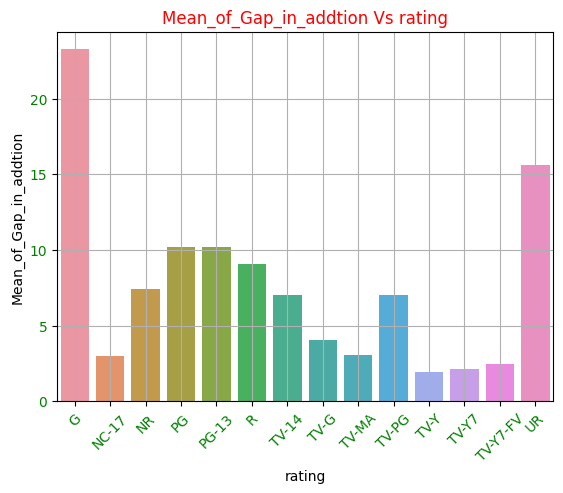

In [34]:
sns.barplot(data = A,
            x='rating',
            y="Mean_of_Gap_in_addtion")
plt.xticks(rotation=45,fontsize=10, color = 'green')
plt.yticks(rotation=0,fontsize=10, color = 'green')
plt.title("Mean_of_Gap_in_addtion Vs rating", color = 'red')
plt.grid()
plt.show()

Since the bars herein are not arranged properly, we can arrange them in asscending or descending order.

In [35]:
A = A.sort_values('Mean_of_Gap_in_addtion', ascending = False)
A

Gap_in_addtion    rating  Mean_of_Gap_in_addtion
0   Gap_in_addtion         G               23.261780
13  Gap_in_addtion        UR               15.604651
3   Gap_in_addtion        PG               10.189872
4   Gap_in_addtion     PG-13               10.171539
5   Gap_in_addtion         R                9.088540
2   Gap_in_addtion        NR                7.405926
6   Gap_in_addtion     TV-14                7.045412
9   Gap_in_addtion     TV-PG                7.005370
7   Gap_in_addtion      TV-G                4.049965
8   Gap_in_addtion     TV-MA                3.047314
1   Gap_in_addtion     NC-17                3.000000
12  Gap_in_addtion  TV-Y7-FV                2.500000
11  Gap_in_addtion     TV-Y7                2.159917
10  Gap_in_addtion      TV-Y                1.932656

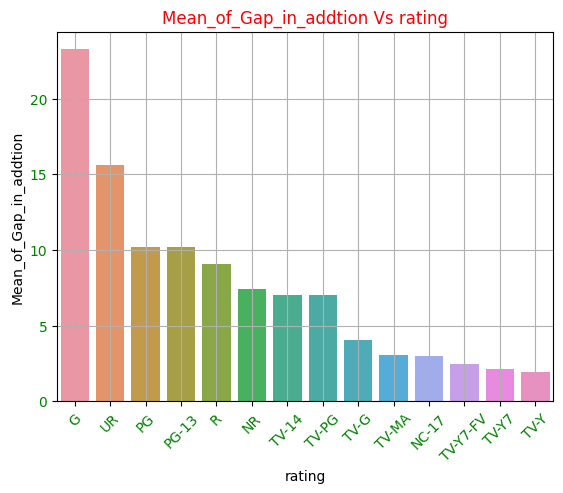

In [36]:
sns.barplot(data = A,
            x='rating',
            y="Mean_of_Gap_in_addtion")
plt.xticks(rotation=45,fontsize=10, color = 'green')
plt.yticks(rotation=0,fontsize=10, color = 'green')
plt.title("Mean_of_Gap_in_addtion Vs rating", color = 'red')
plt.grid()
plt.show()

In [37]:
A = df.groupby(['type'])[['country']].value_counts().reset_index()
A

type          country      0
0      Movie    United States  37504
1      Movie            India  20629
2      Movie    United States   7372
3      Movie   United Kingdom   5516
4      Movie           France   3567
..       ...              ...    ...
213  TV Show   United Kingdom      5
214  TV Show           Greece      3
215  TV Show     South Africa      2
216  TV Show            Italy      2
217  TV Show           Israel      2

[218 rows x 3 columns]

In [38]:
A.columns = ['type', 'country', 'Counts_of_shows']
A = A.sort_values('Counts_of_shows', ascending = False)
A.head()

type         country  Counts_of_shows
0  Movie   United States            37504
1  Movie           India            20629
2  Movie   United States             7372
3  Movie  United Kingdom             5516
4  Movie          France             3567

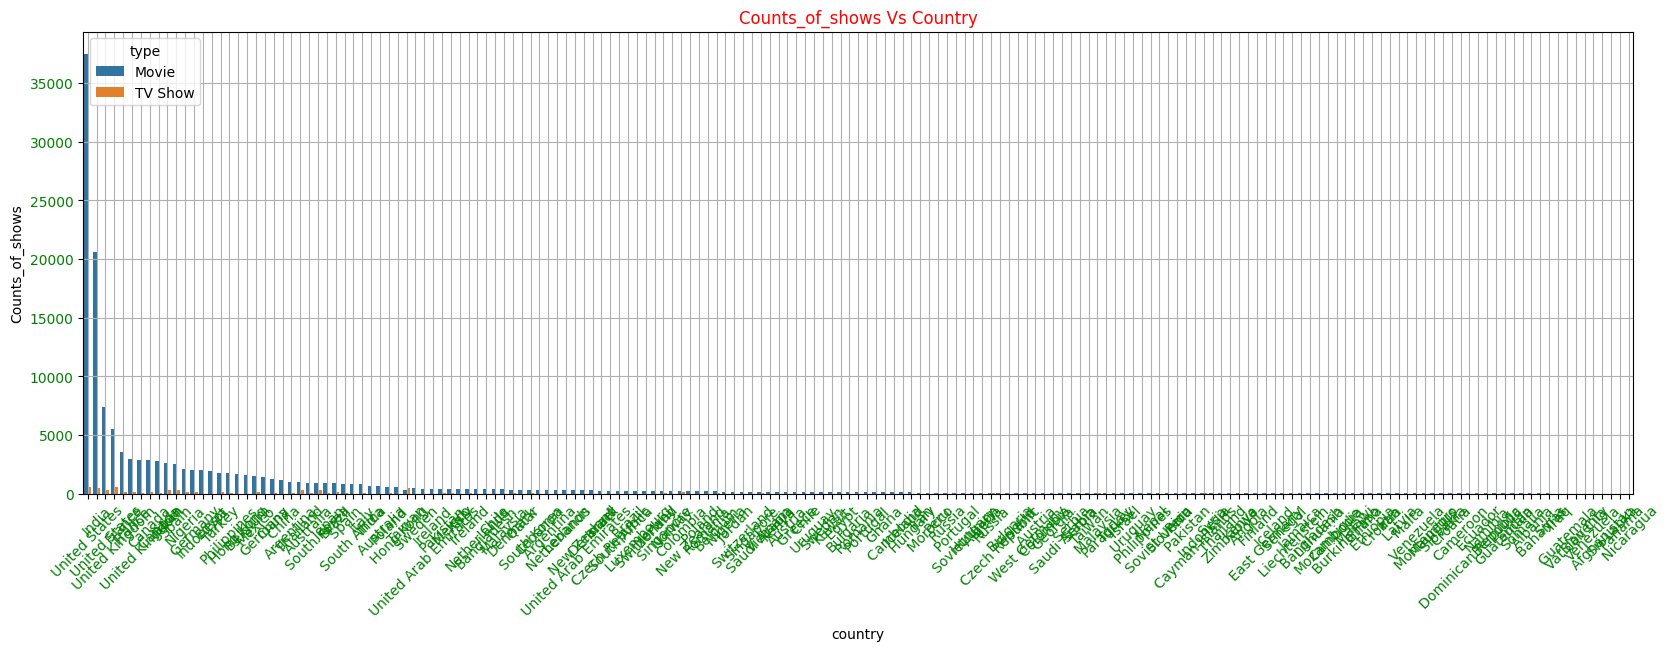

In [39]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(data = A,
            x='country',
            y="Counts_of_shows",
            hue = 'type')
plt.xticks(rotation=45,fontsize=10, color = 'green')
plt.yticks(rotation=0,fontsize=10, color = 'green')
plt.title("Counts_of_shows Vs Country", color = 'red')
plt.grid()
plt.show()

herein we could eaaisly infer that the realese in some countries has been very poor.

In [40]:
A = A[A['Counts_of_shows']>500]
A

type          country  Counts_of_shows
0      Movie    United States            37504
1      Movie            India            20629
2      Movie    United States             7372
3      Movie   United Kingdom             5516
4      Movie           France             3567
5      Movie           France             2986
6      Movie   United Kingdom             2898
7      Movie           Canada             2835
8      Movie           Canada             2792
9      Movie            Japan             2635
10     Movie            Spain             2552
11     Movie          Nigeria             2077
12     Movie          Germany             2016
13     Movie        Indonesia             1985
14     Movie            Egypt             1884
15     Movie           Turkey             1773
16     Movie      Philippines             1765
17     Movie        Hong Kong             1668
18     Movie          Belgium             1547
19     Movie           Mexico             1497
20     Movie          Germany             1374
21     Movie            China             1215
22     Movie            China             1136
23     Movie        Argentina             1024
24     Movie         Thailand             1014
25     Movie        Australia              898
26     Movie      South Korea              889
27     Movie            Japan              876
28     Movie           Brazil              868
29     Movie            Spain              851
30     Movie     South Africa              844
31     Movie            Italy              801
32     Movie            India              639
33     Movie        Australia              627
175  TV Show   United Kingdom              591
34     Movie           Poland              578
176  TV Show    United States              552
35     Movie        Hong Kong              533

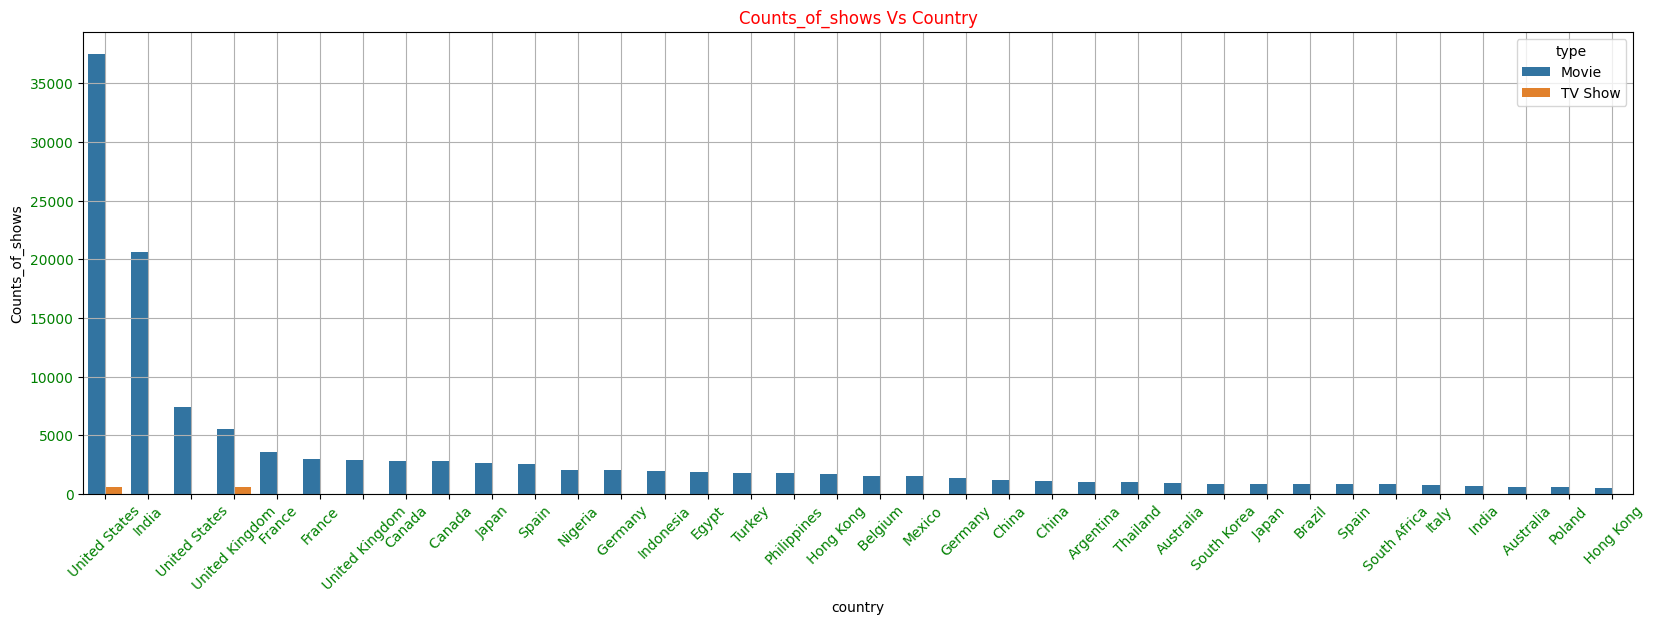

In [41]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(data = A,
            x='country',
            y="Counts_of_shows",
            hue = 'type')
plt.xticks(rotation=45,fontsize=10, color = 'green')
plt.yticks(rotation=0,fontsize=10, color = 'green')
plt.title("Counts_of_shows Vs Country", color = 'red')
plt.grid()
plt.show()

Now since the inference & filters are showing that below 500 show release is not of much use we can remove the same from main dataset as well, bofore we proceed with the data further.

In [42]:
##Let's look into top 10 contries with respect to releases
A = A.head(10)
A

type          country  Counts_of_shows
0  Movie    United States            37504
1  Movie            India            20629
2  Movie    United States             7372
3  Movie   United Kingdom             5516
4  Movie           France             3567
5  Movie           France             2986
6  Movie   United Kingdom             2898
7  Movie           Canada             2835
8  Movie           Canada             2792
9  Movie            Japan             2635

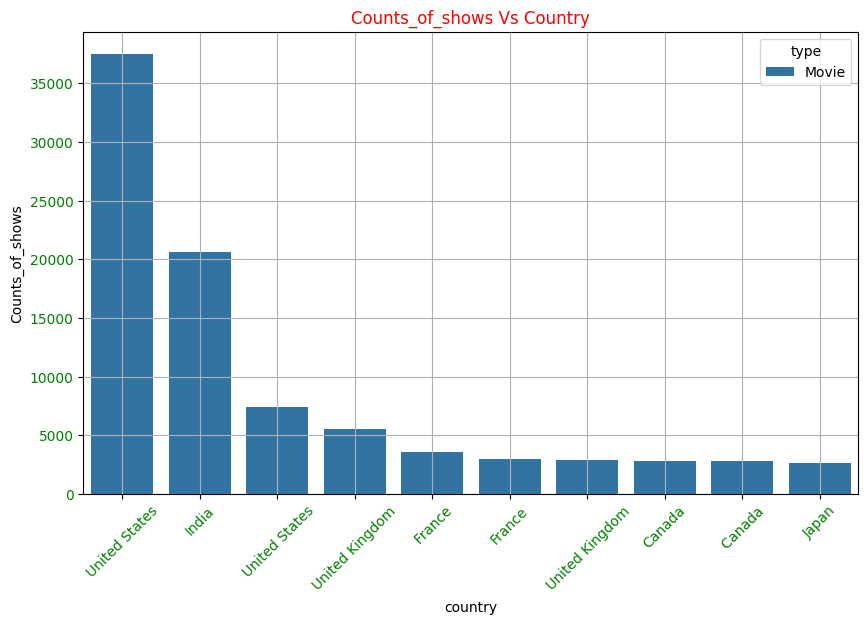

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data = A,
            x='country',
            y="Counts_of_shows",
            hue = 'type')
plt.xticks(rotation=45,fontsize=10, color = 'green')
plt.yticks(rotation=0,fontsize=10, color = 'green')
plt.title("Counts_of_shows Vs Country", color = 'red')
plt.grid()
plt.show()

Top 10 countries apparently has no TV show release.

In [44]:
df.head(1)

type    title  release_year rating         Actor   Genre      director  \
0  Movie  Sankofa          1993  TV-MA  Kofi Ghanaba  Dramas  Haile Gerima   

         country  duration1 Day_added  Weekday_added  Month_added  \
0  United States        125    Friday              4            9   

   DayofYear_added  Year_added  Gap_in_addtion  
0              267        2021              28

In [45]:
A = df.groupby(['director', 'Actor'])[['country']].value_counts().reset_index()
A

director                 Actor        country  0
0       Aaron Moorhead        Ally Ioannides  United States  1
1       Aaron Moorhead       Bill Oberst Jr.  United States  1
2       Aaron Moorhead      Callie Hernandez  United States  3
3       Aaron Moorhead          James Jordan  United States  3
4       Aaron Moorhead          Jamie Dornan  United States  1
...                ...                   ...            ... ..
61575     Şenol Sönmez          Yosi Mizrahi         Turkey  3
61576     Şenol Sönmez          Zerrin Sümer         Turkey  3
61577     Şenol Sönmez   Özgür Emre Yıldırım         Turkey  3
61578     Şenol Sönmez             Ali Sunal         Turkey  3
61579     Şenol Sönmez             Murat Boz         Turkey  3

[61580 rows x 4 columns]

In [46]:
A.columns = ['director', 'Actor', 'country', 'Count_of_directors_per_show']
A = A.sort_values('Count_of_directors_per_show', ascending = False)
A.head(20)

director             Actor        country  \
58398    Toshiya Shinohara  Kappei Yamaguchi          Japan   
58382    Toshiya Shinohara   Houko Kuwashima          Japan   
58387    Toshiya Shinohara    Koji Tsujitani          Japan   
58388    Toshiya Shinohara   Kumiko Watanabe          Japan   
58395    Toshiya Shinohara    Satsuki Yukino          Japan   
18054         David Dhawan       Anupam Kher          India   
14687  Cathy Garcia-Molina     Joross Gamboa    Philippines   
61119       Yılmaz Erdoğan    Yılmaz Erdoğan         Turkey   
57026       Thierry Donard    Wille Lindberg         France   
58384    Toshiya Shinohara        Ken Narita          Japan   
58393    Toshiya Shinohara     Noriko Hidaka          Japan   
54125   Sooraj R. Barjatya         Alok Nath          India   
24436          Hakan Algül      Salih Kalyon         Turkey   
14728  Cathy Garcia-Molina   John Lloyd Cruz    Philippines   
54161   Sooraj R. Barjatya       Salman Khan          India   
38265      Masahiko Murata    Junko Takeuchi          Japan   
43270          Omoni Oboli       Omoni Oboli        Nigeria   
55535     Steven Spielberg     Harrison Ford  United States   
57015       Thierry Donard     Jesse Richman         France   
57022       Thierry Donard      Matt Annetts         France   

       Count_of_directors_per_show  
58398                           21  
58382                           21  
58387                           21  
58388                           21  
58395                           21  
18054                           18  
14687                           17  
61119                           16  
57026                           15  
58384                           15  
58393                           15  
54125                           15  
24436                           13  
14728                           13  
54161                           12  
38265                           12  
43270                           12  
55535                           12  
57015                           12  
57022                           12

In [47]:
A = A.groupby(['country']).value_counts().reset_index().sort_values('Count_of_directors_per_show', ascending = False)
A

country           director               Actor  \
32164          Japan  Toshiya Shinohara      Satsuki Yukino   
32151          Japan  Toshiya Shinohara     Houko Kuwashima   
32167          Japan  Toshiya Shinohara    Kappei Yamaguchi   
32157          Japan  Toshiya Shinohara     Kumiko Watanabe   
32156          Japan  Toshiya Shinohara      Koji Tsujitani   
...              ...                ...                 ...   
49869  United States     Michael Tiddes        Glynn Turman   
49876  United States     Michael Tiddes   Michael Ian Black   
49879  United States     Michael Tiddes       Molly Shannon   
49885  United States      Michael Rymer   Nasir 'Nas' Jones   
50565  United States         Steve Pink        Hannah Marks   

       Count_of_directors_per_show  0  
32164                           21  1  
32151                           21  1  
32167                           21  1  
32157                           21  1  
32156                           21  1  
...                            ... ..  
49869                            1  1  
49876                            1  1  
49879                            1  1  
49885                            1  1  
50565                            1  1  

[61580 rows x 5 columns]

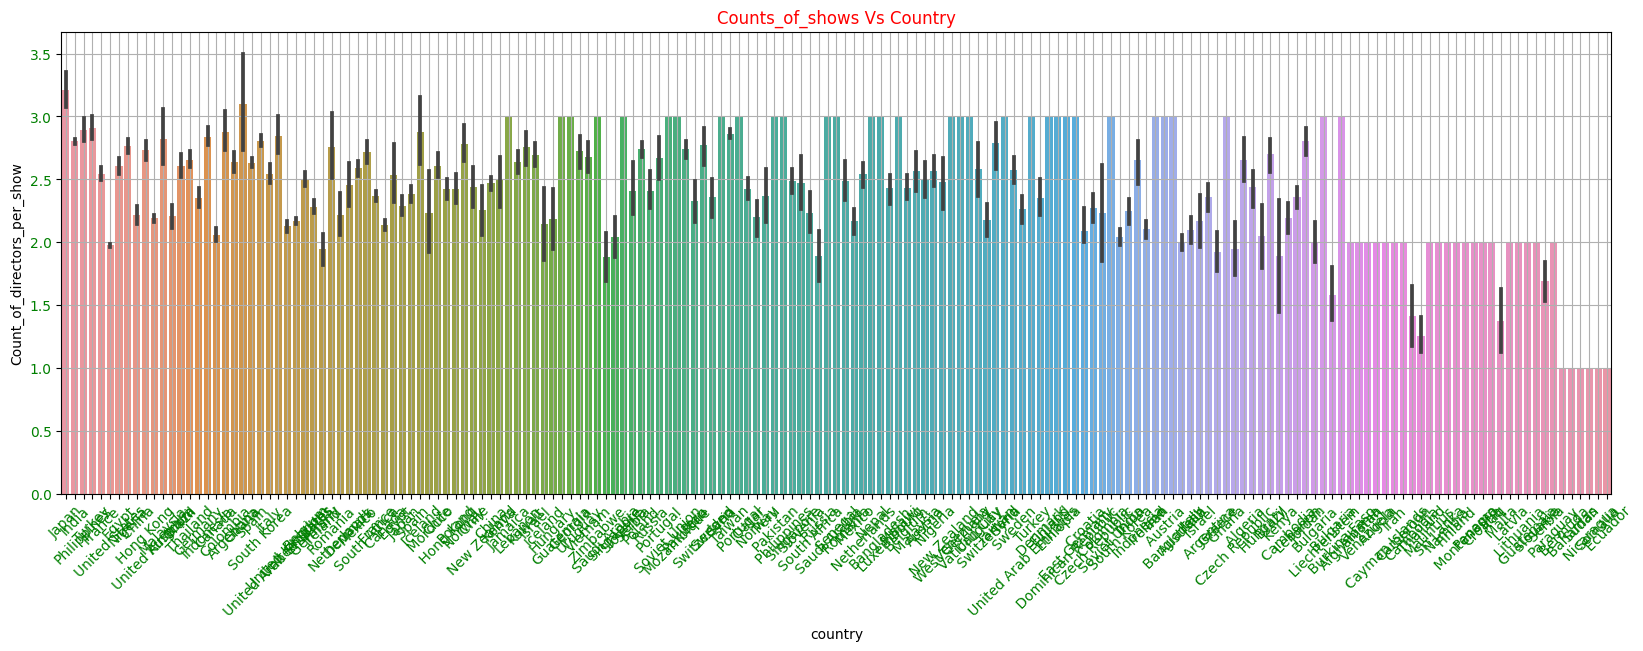

In [48]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(data = A,
            x='country',
            y="Count_of_directors_per_show")
plt.xticks(rotation=45,fontsize=10, color = 'green')
plt.yticks(rotation=0,fontsize=10, color = 'green')
plt.title("Counts_of_shows Vs Country", color = 'red')
plt.grid()
plt.show()

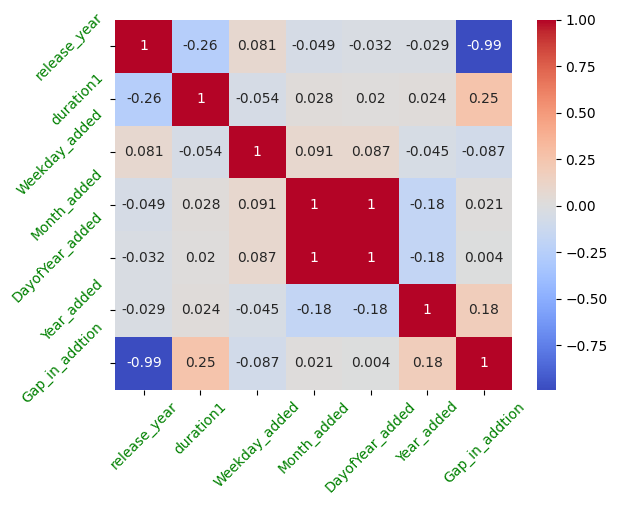

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.xticks(rotation=45, color = 'Green')
plt.yticks(rotation=45, color = 'Green')
plt.show()

The heatmap is to only provide inference about the continuous varibles. Herein +ve values inside the heatmap cells are indiacating that variables are corelated with each other positively with repsoect to the given corralaation factor.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143163 entries, 0 to 143162
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   type             143163 non-null  object
 1   title            143163 non-null  object
 2   release_year     143163 non-null  int64 
 3   rating           143163 non-null  object
 4   Actor            143163 non-null  object
 5   Genre            143163 non-null  object
 6   director         143163 non-null  object
 7   country          143163 non-null  object
 8   duration1        143163 non-null  int64 
 9   Day_added        143163 non-null  object
 10  Weekday_added    143163 non-null  int64 
 11  Month_added      143163 non-null  int64 
 12  DayofYear_added  143163 non-null  int64 
 13  Year_added       143163 non-null  int64 
 14  Gap_in_addtion   143163 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 16.4+ MB


In [51]:
df.head(1)

type    title  release_year rating         Actor   Genre      director  \
0  Movie  Sankofa          1993  TV-MA  Kofi Ghanaba  Dramas  Haile Gerima   

         country  duration1 Day_added  Weekday_added  Month_added  \
0  United States        125    Friday              4            9   

   DayofYear_added  Year_added  Gap_in_addtion  
0              267        2021              28

In [52]:
df['type'].value_counts()

Movie      137603
TV Show      5560
Name: type, dtype: int64

In [53]:
df.groupby(["type"])["duration1"].mean()

type
Movie      107.490389
TV Show      1.878597
Name: duration1, dtype: float64

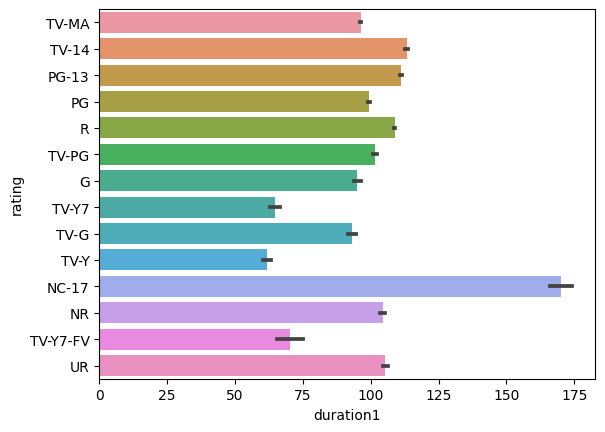

In [54]:
import numpy as np
sns.barplot(data = df,
            y = 'rating',
            x = 'duration1')
plt.show()

Since 84 min, 72 min, 66 min rating has no durtion for the movies therefere these rows can be deleted from the main dataset.

In [55]:
print(df.shape)
df.drop(df[df['rating'] == '84 min'].index, inplace = True)
df.drop(df[df['rating'] == '74 min'].index, inplace = True)
df.drop(df[df['rating'] == '66 min'].index, inplace = True)
print(df.shape)

(143163, 15)
(143163, 15)


In [56]:
df_movies = df[df['type'] == 'Movie']
df_movies.shape

(137603, 15)

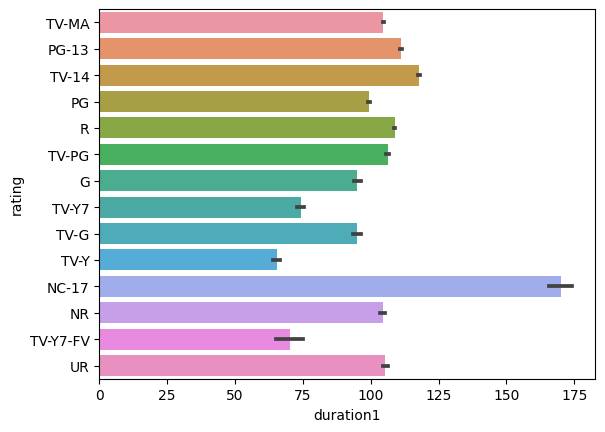

In [57]:
import numpy as np
sns.barplot(data = df_movies,
            y = 'rating',
            x = 'duration1')
plt.show()

Here we could not see any rating with no data.

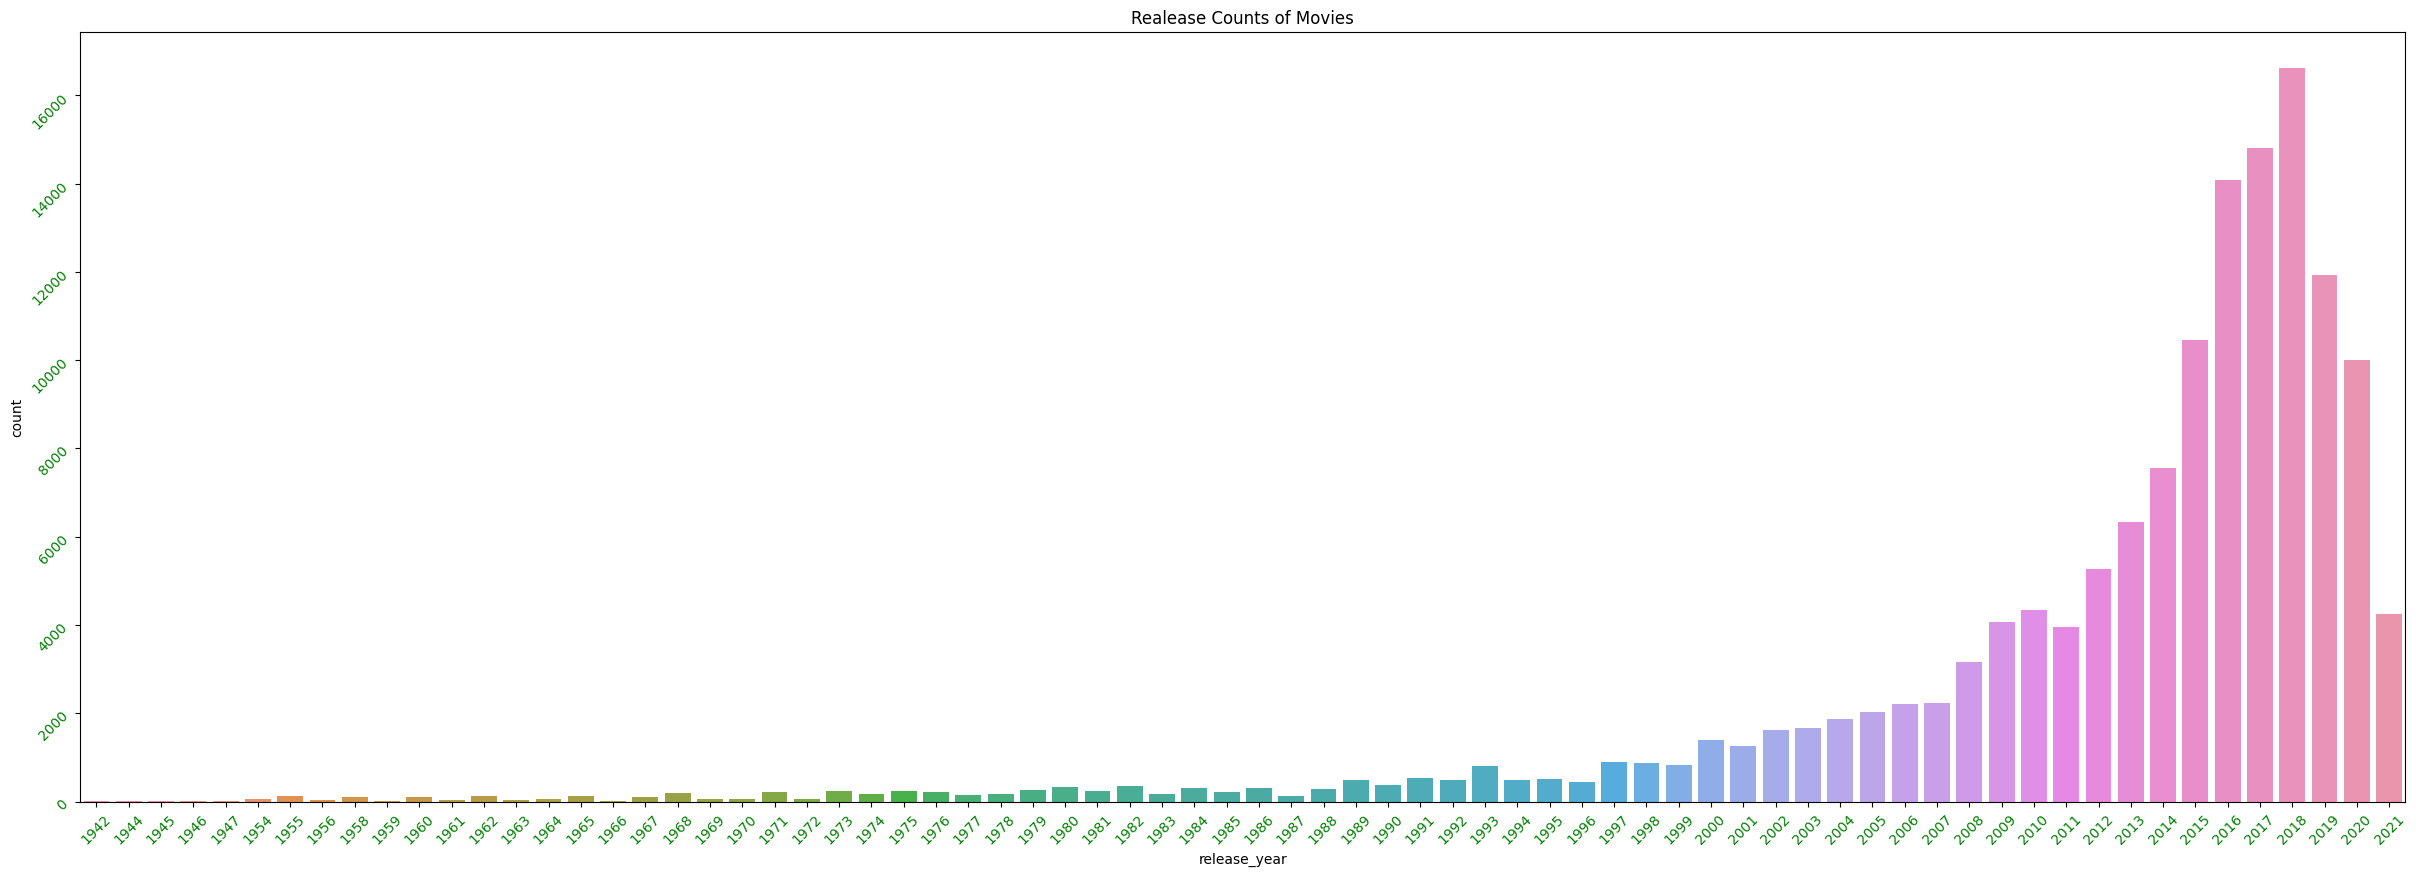

In [58]:
plt.figure(figsize=(30,10))
sns.countplot(data=df, x="release_year")
plt.xticks(rotation=45, fontsize=10, color = 'Green')
plt.yticks(rotation=45, fontsize=10, color = 'Green')
plt.title("Realease Counts of Movies")
plt.show()

We can eisly infer that the number of relases over the time has been increase & can be considered exploding nearly after 2006. But before that the number of relases were very less. Let's analyse the data for movies & TV saperatley.

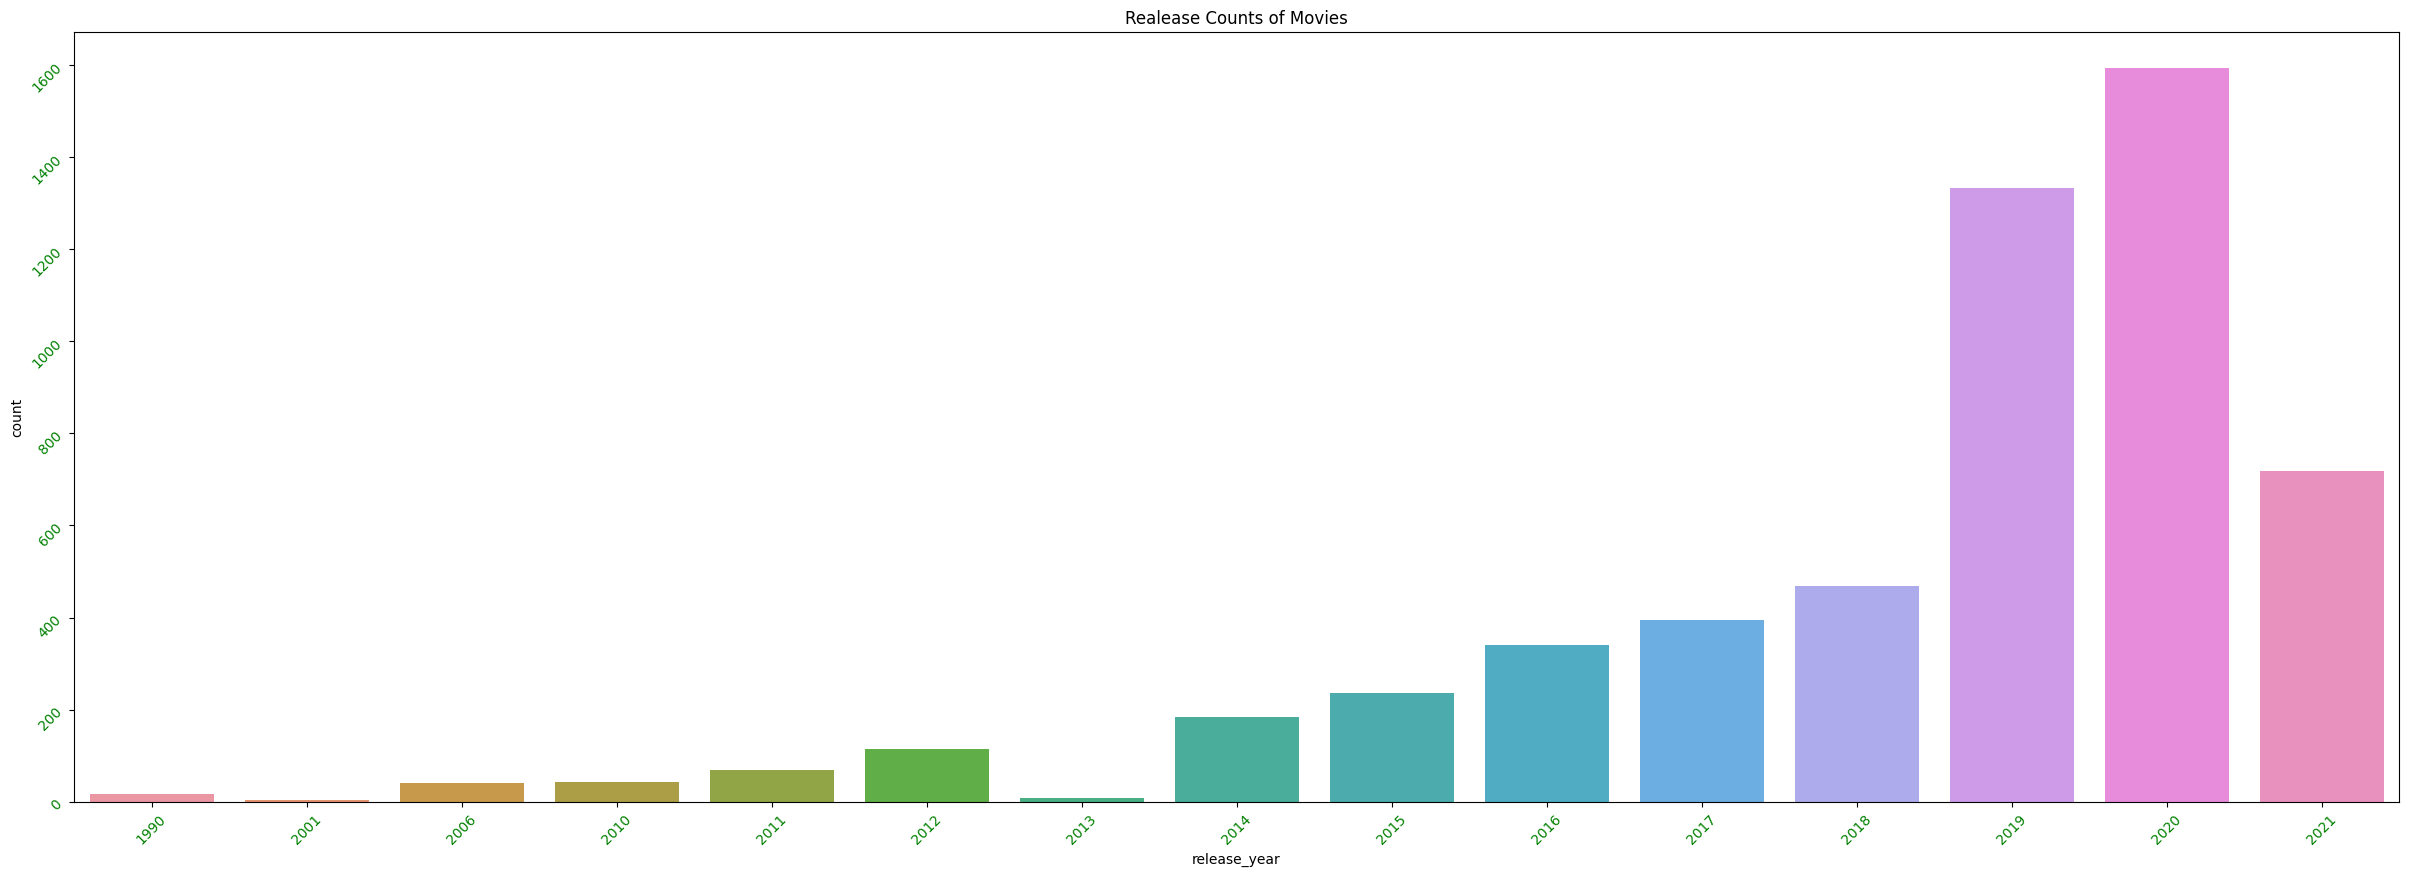

In [59]:
plt.figure(figsize=(30,10))
sns.countplot(data=df_TV, x="release_year")
plt.xticks(rotation=45, fontsize=10, color = 'Green')
plt.yticks(rotation=45, fontsize=10, color = 'Green')
plt.title("Realease Counts of Movies")
plt.show()

We can see that the scenario is aalmost same therefore we can now remove the data before 2005.

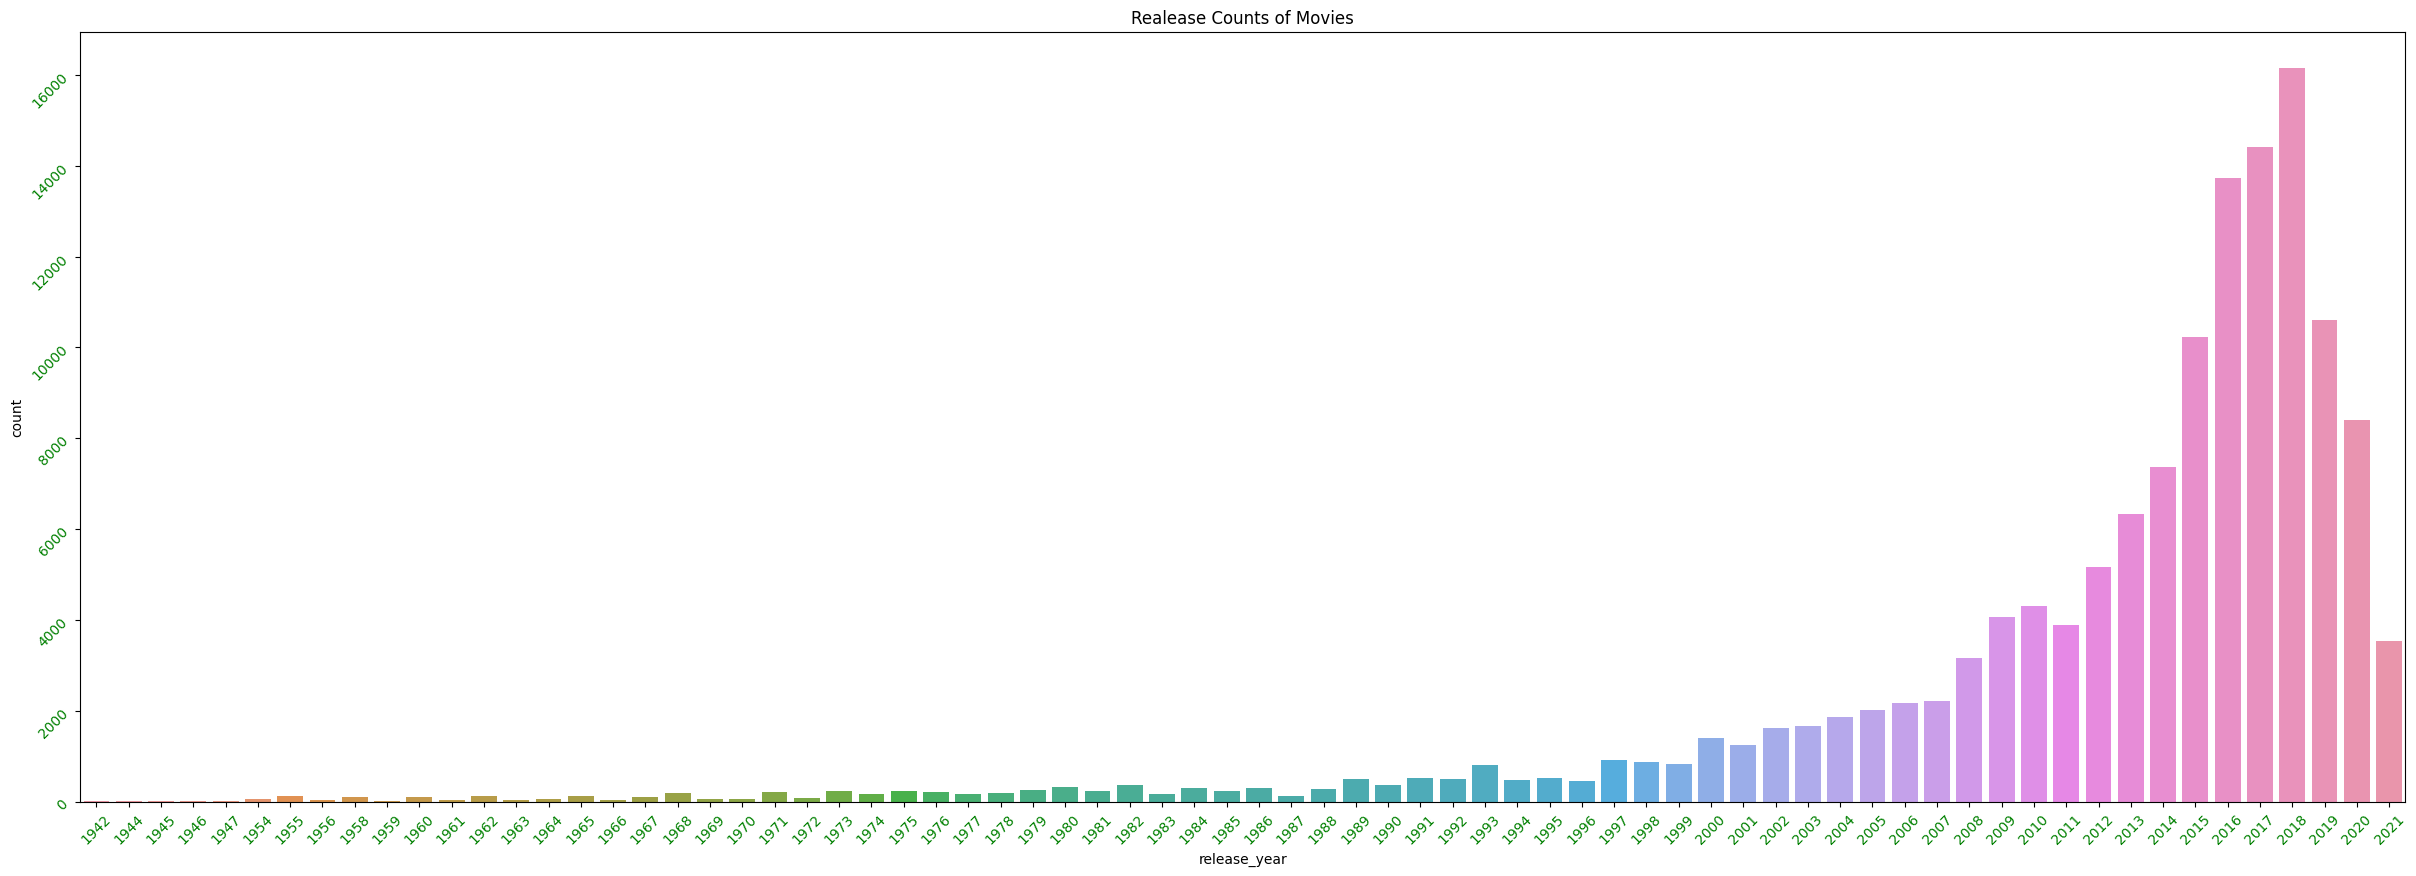

In [60]:
plt.figure(figsize=(30,10))
sns.countplot(data=df_movies, x="release_year")
plt.xticks(rotation=45, fontsize=10, color = 'Green')
plt.yticks(rotation=45, fontsize=10, color = 'Green')
plt.title("Realease Counts of Movies")
plt.show()

In [61]:
print('Original Dataset: ', df.shape)
df = df[df['release_year']>=2005]
print('Trimmed Dataset: ', df.shape)

Original Dataset:  (143163, 15)
Trimmed Dataset:  (123293, 15)


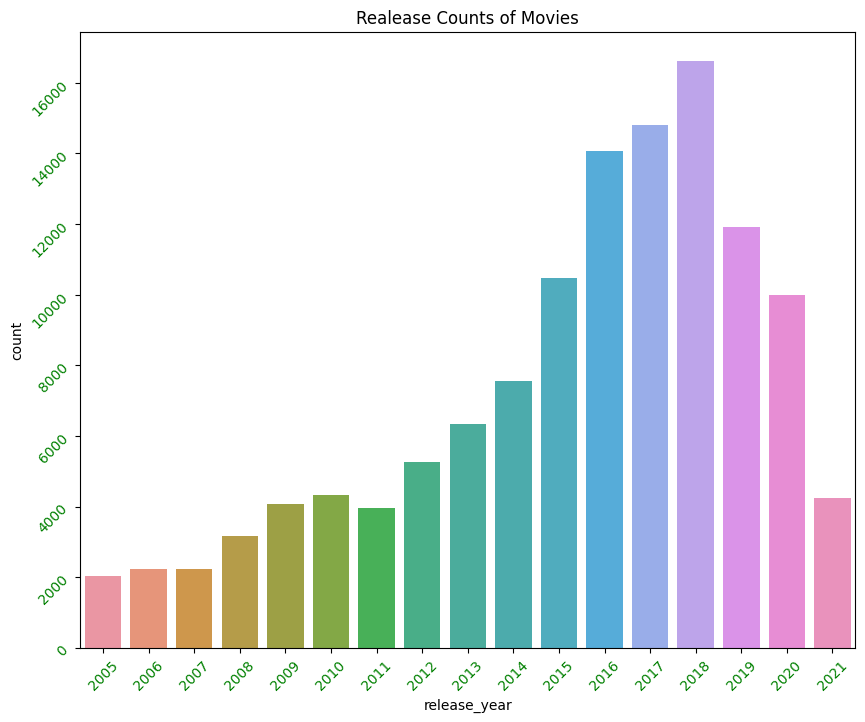

In [62]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x="release_year")
plt.xticks(rotation=45, fontsize=10, color = 'Green')
plt.yticks(rotation=45, fontsize=10, color = 'Green')
plt.title("Realease Counts of Movies")
plt.show()

In [63]:
df.head(1)

type                          title  release_year rating         Actor  \
1  TV Show  The Great British Baking Show          2021  TV-14  Mel Giedroyc   

              Genre         director         country  duration1 Day_added  \
1  British TV Shows  Andy Devonshire  United Kingdom          9    Friday   

   Weekday_added  Month_added  DayofYear_added  Year_added  Gap_in_addtion  
1              4            9              267        2021               0

In [64]:
find_sup_hits = df.groupby(['director', 
                            'Actor'])[['rating']].agg(pd.Series.mode).reset_index()

find_sup_hits

director                 Actor rating
0       Aaron Moorhead        Ally Ioannides      R
1       Aaron Moorhead       Bill Oberst Jr.      R
2       Aaron Moorhead      Callie Hernandez  TV-MA
3       Aaron Moorhead          James Jordan  TV-MA
4       Aaron Moorhead          Jamie Dornan      R
...                ...                   ...    ...
40057     Şenol Sönmez          Yosi Mizrahi  TV-14
40058     Şenol Sönmez          Zerrin Sümer  TV-14
40059     Şenol Sönmez   Özgür Emre Yıldırım  TV-14
40060     Şenol Sönmez             Ali Sunal  TV-14
40061     Şenol Sönmez             Murat Boz  TV-14

[40062 rows x 3 columns]

In [65]:
find_sup_hits = df.groupby(['director'])[['rating']].value_counts().reset_index()
find_sup_hits

director rating   0
0                Aaron Moorhead  TV-MA  18
1                Aaron Moorhead      R   6
2      Abbas Alibhai Burmawalla  TV-14  18
3              Abdullah Al Noor  TV-MA  30
4           Abhinav Shiv Tiwari  TV-MA  24
...                         ...    ...  ..
4523                Çagan Irmak  TV-14  20
4524           Ísold Uggadóttir  TV-14  27
4525        Óskar Thór Axelsson  TV-MA  20
4526           Ömer Faruk Sorak  TV-MA  24
4527               Şenol Sönmez  TV-14  48

[4528 rows x 3 columns]

In [66]:
Director_movie_counts = df.groupby(['director'])[['director']].value_counts().reset_index()
Director_movie_counts.columns = ['director', 'movie_counts']
Director_movie_counts = Director_movie_counts.sort_values(by = ['movie_counts'], ascending=False).reset_index().head(20)
Director_movie_counts

index             director  movie_counts
0    1062  Cathy Garcia-Molina           356
1    2354       Lars von Trier           336
2    3159         Raja Gosnell           308
3    3817           Tom Hooper           306
4    2593      Martin Scorsese           271
5    3976           Wilson Yip           260
6    1400     Don Michael Paul           255
7    2931      Olivier Assayas           240
8    4011     Yorgos Lanthimos           231
9    3300         Robert Vince           220
10   2891           Noam Murro           219
11   2656                  McG           219
12   2890        Noah Baumbach           212
13    816           Ari Folman           210
14   3342           Ron Howard           205
15    667       Ali F. Mostafa           204
16   2329       Kunle Afolayan           201
17   3768        Thomas Astruc           193
18   3657     Steven Spielberg           191
19   1517      Federico Veiroj           189

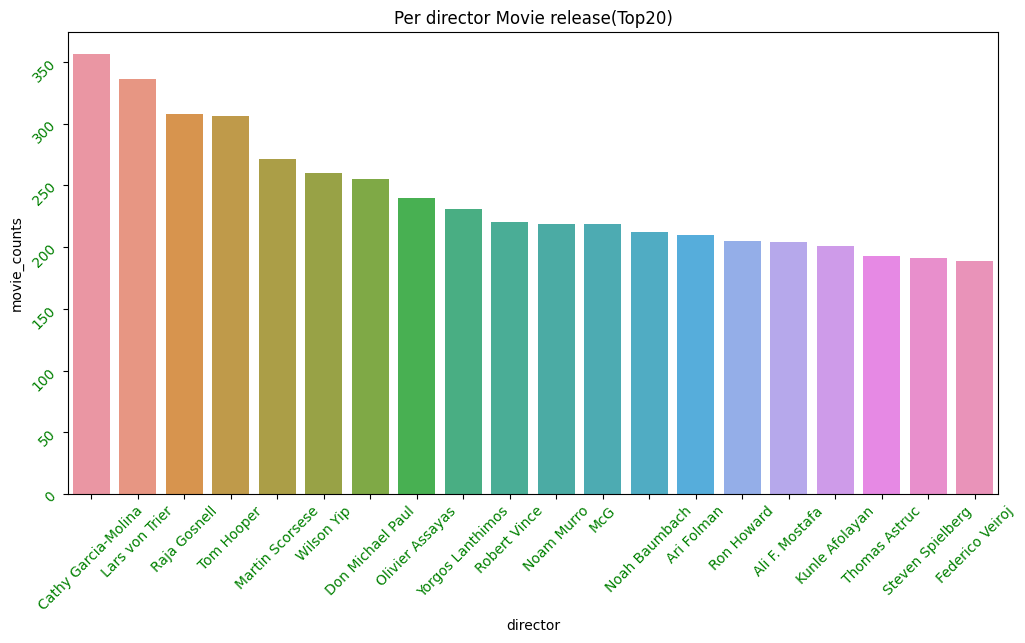

In [67]:
plt.figure(figsize=(12,6))

sns.barplot(data = Director_movie_counts,
            x="director", 
            y ='movie_counts')
plt.xticks(rotation=45, fontsize=10, color = 'Green')
plt.yticks(rotation=45, fontsize=10, color = 'Green')
plt.title("Per director Movie release(Top20)")
plt.show()

In [68]:
A = df['Genre'].value_counts().reset_index()
A.columns = ['Genre', 'Genre_counts']
A

Genre  Genre_counts
0           International Movies         22513
1                         Dramas         17124
2                       Comedies         11715
3             Action & Adventure          9116
4             Independent Movies          8667
..                           ...           ...
64  Stand-Up Comedy & Talk Shows             9
65           Science & Nature TV             7
66                    Reality TV             6
67                  LGBTQ Movies             5
68                    Reality TV             1

[69 rows x 2 columns]

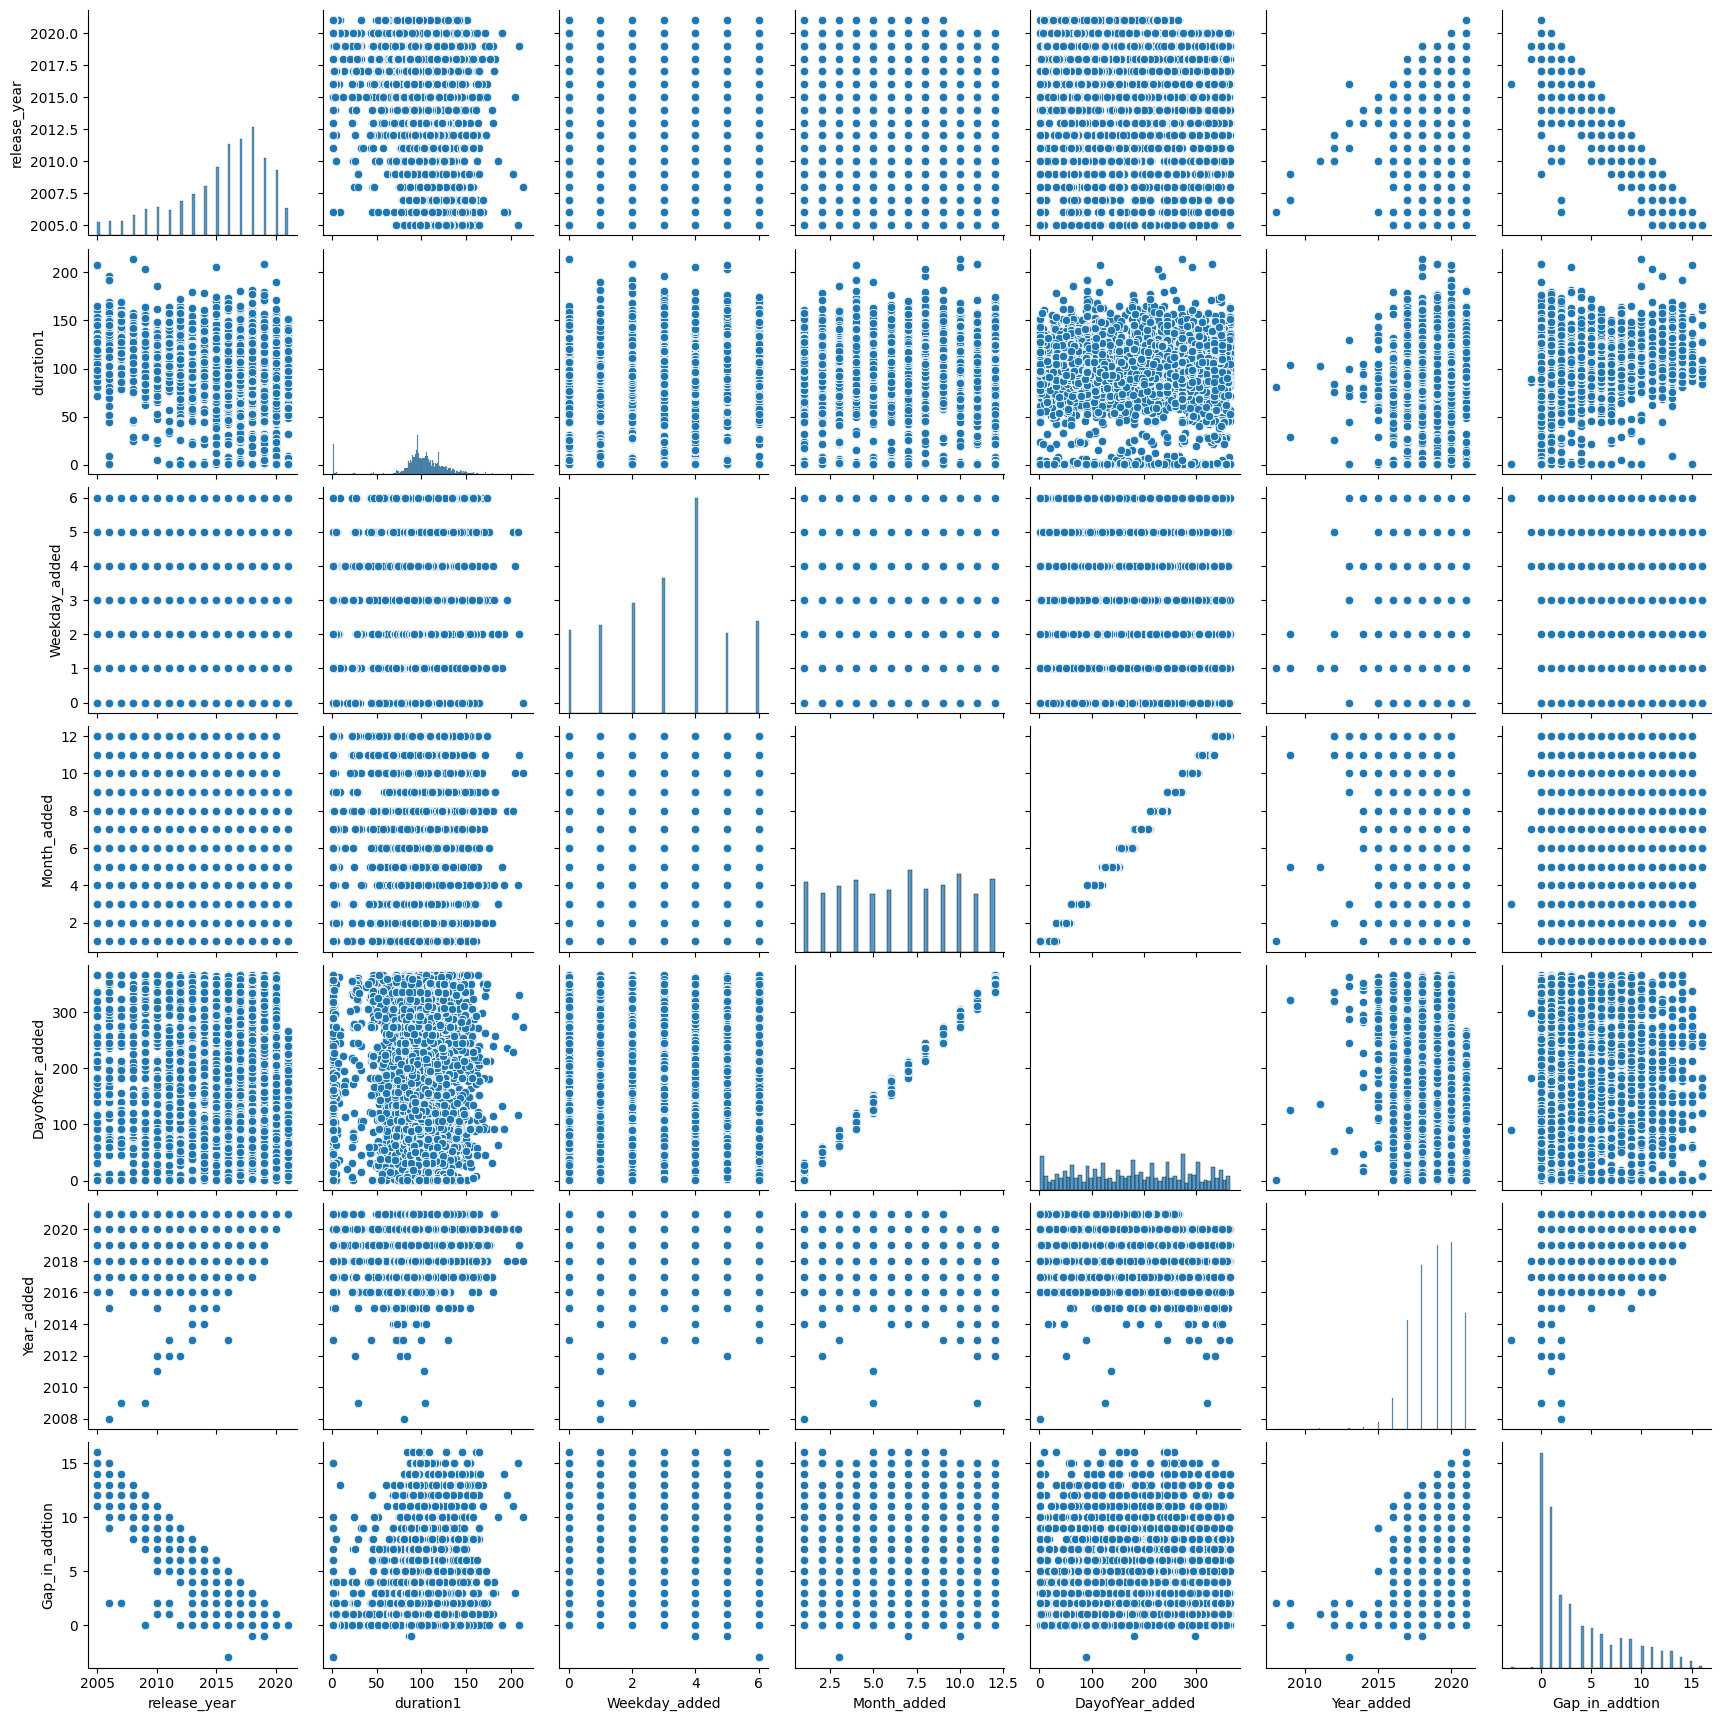

In [69]:
sns.pairplot(df)
plt.show()

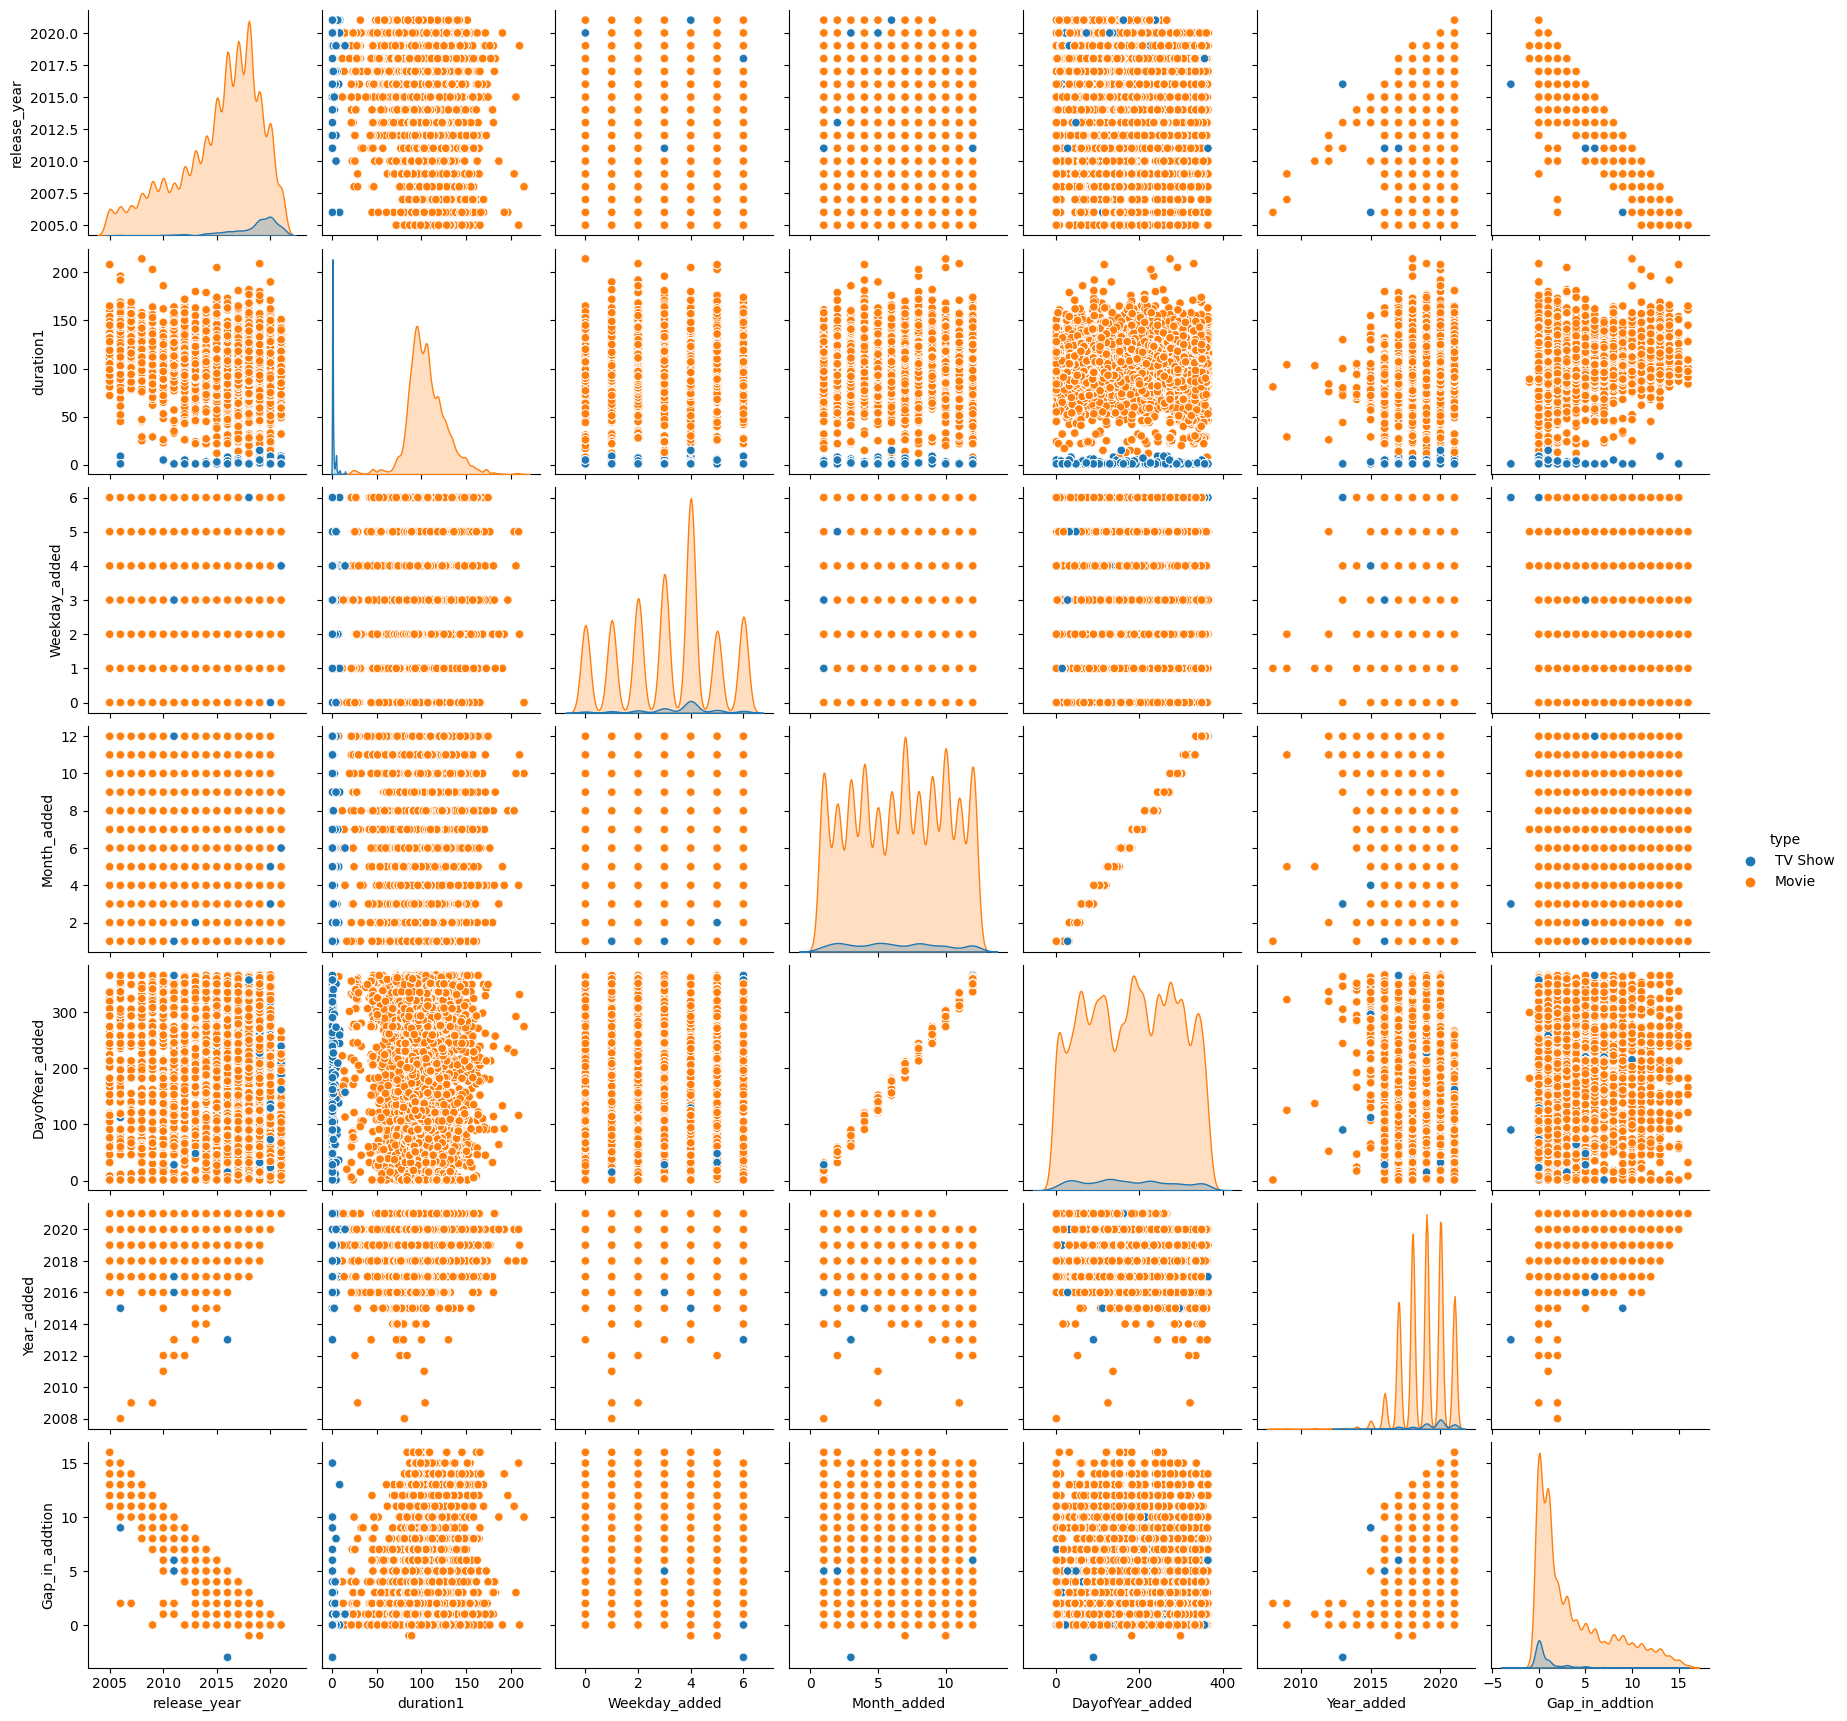

In [70]:
sns.pairplot(df, hue = 'type')
plt.show()

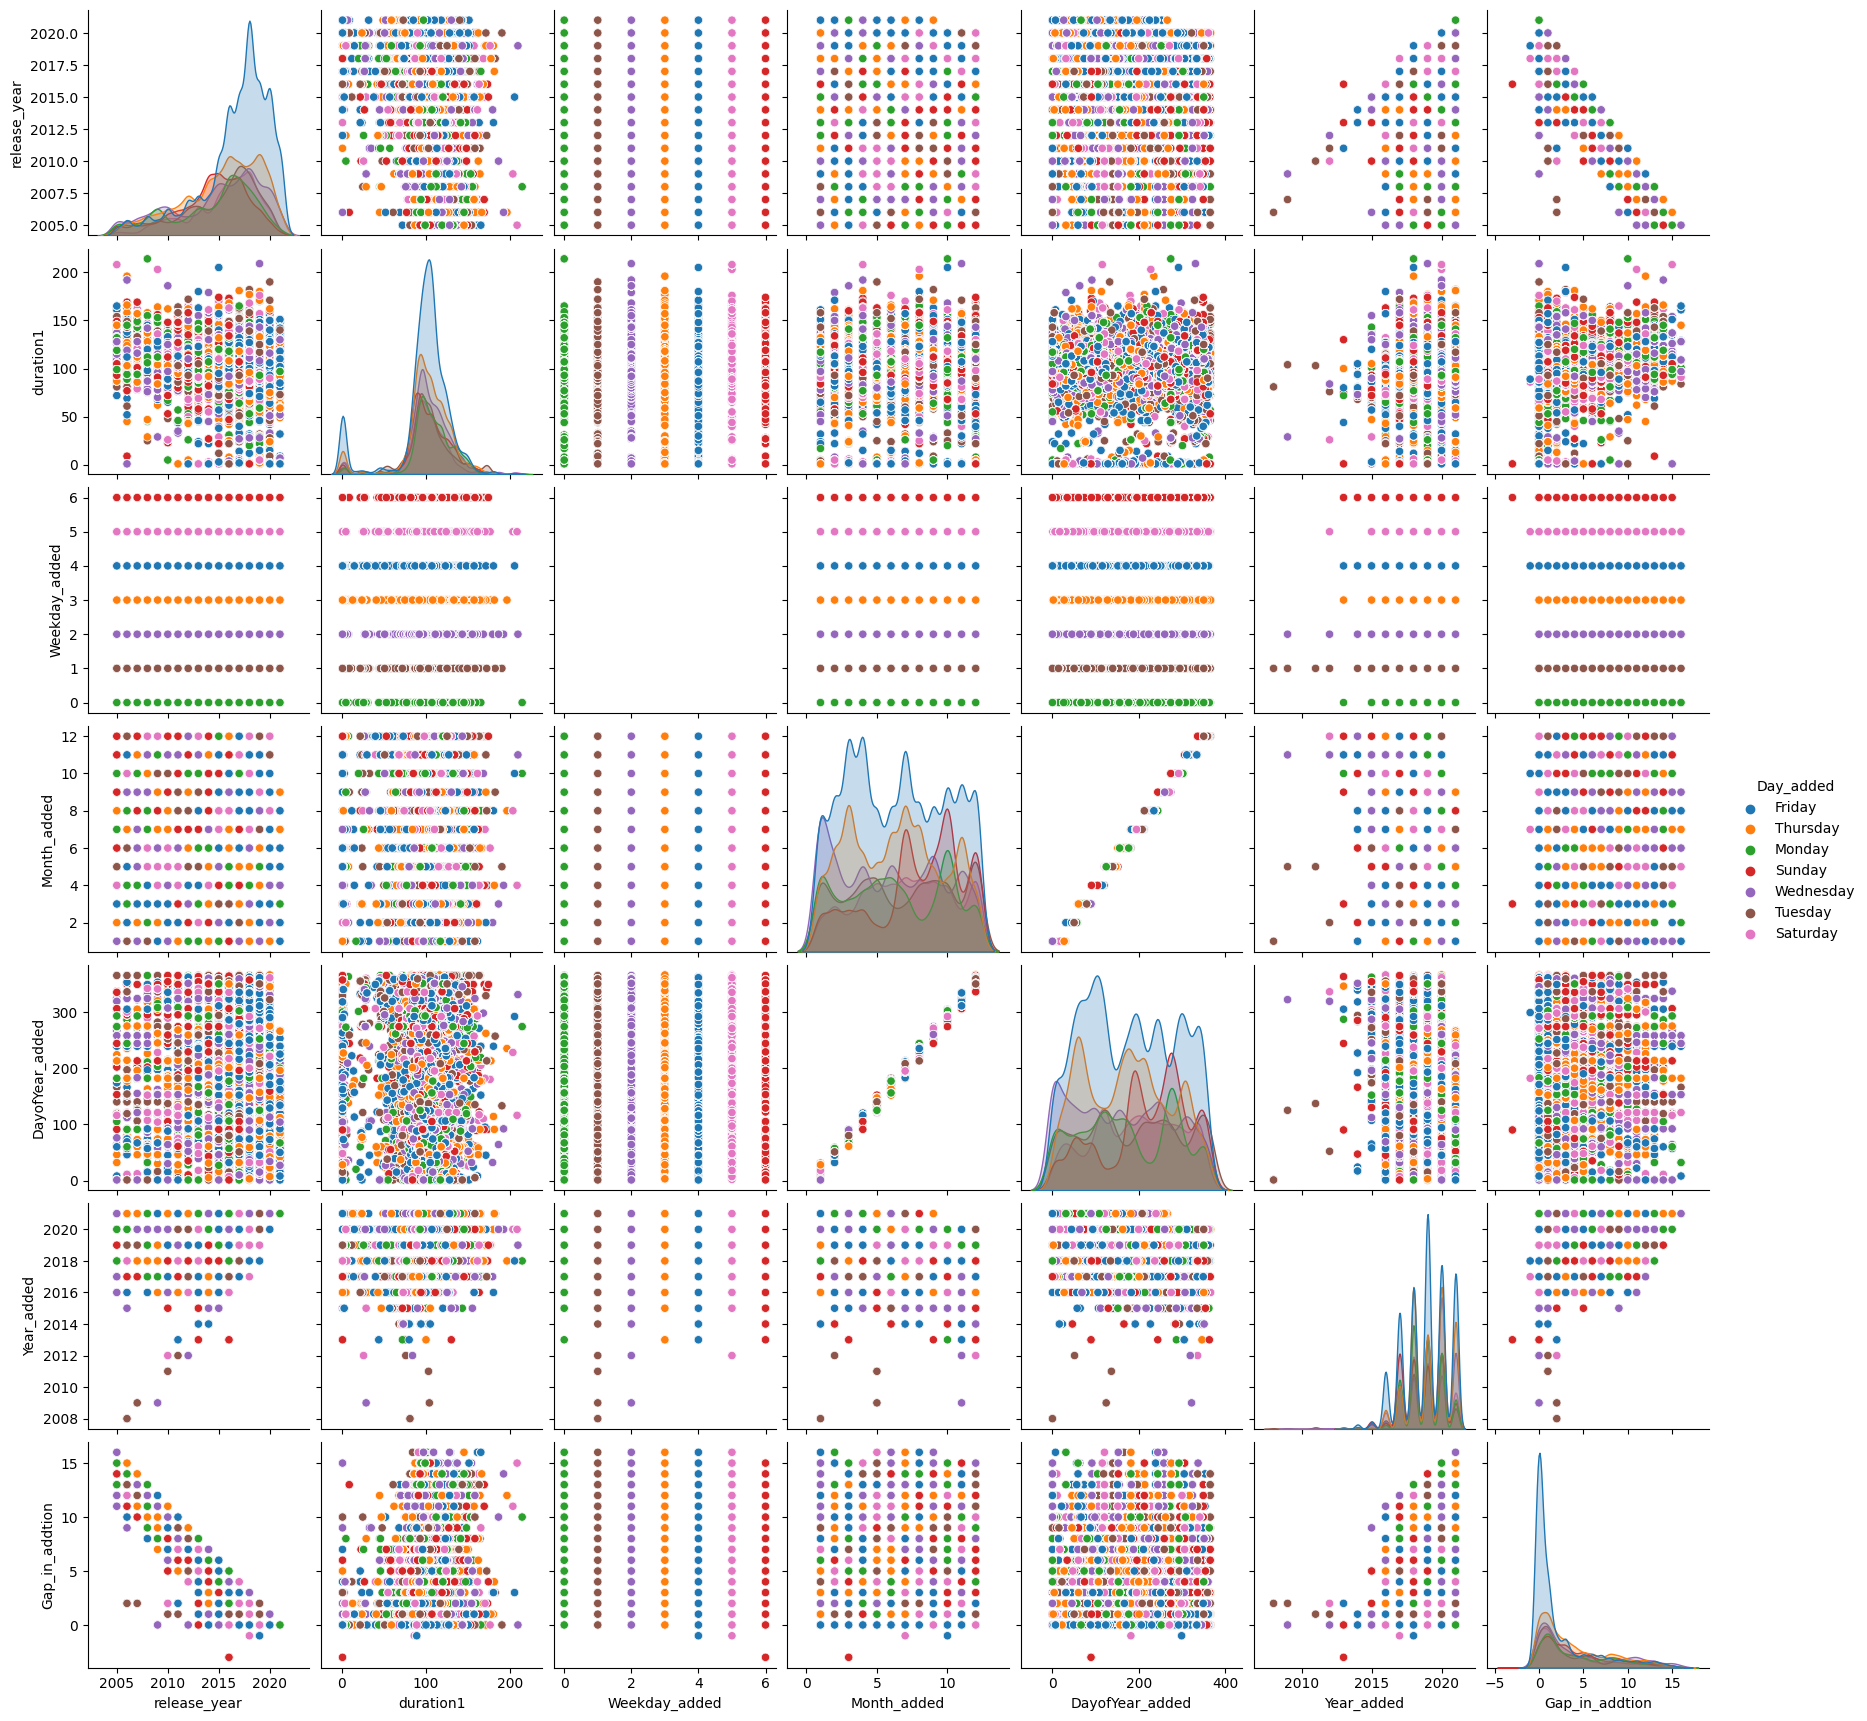

In [71]:
sns.pairplot(df, hue = 'Day_added')
plt.show()

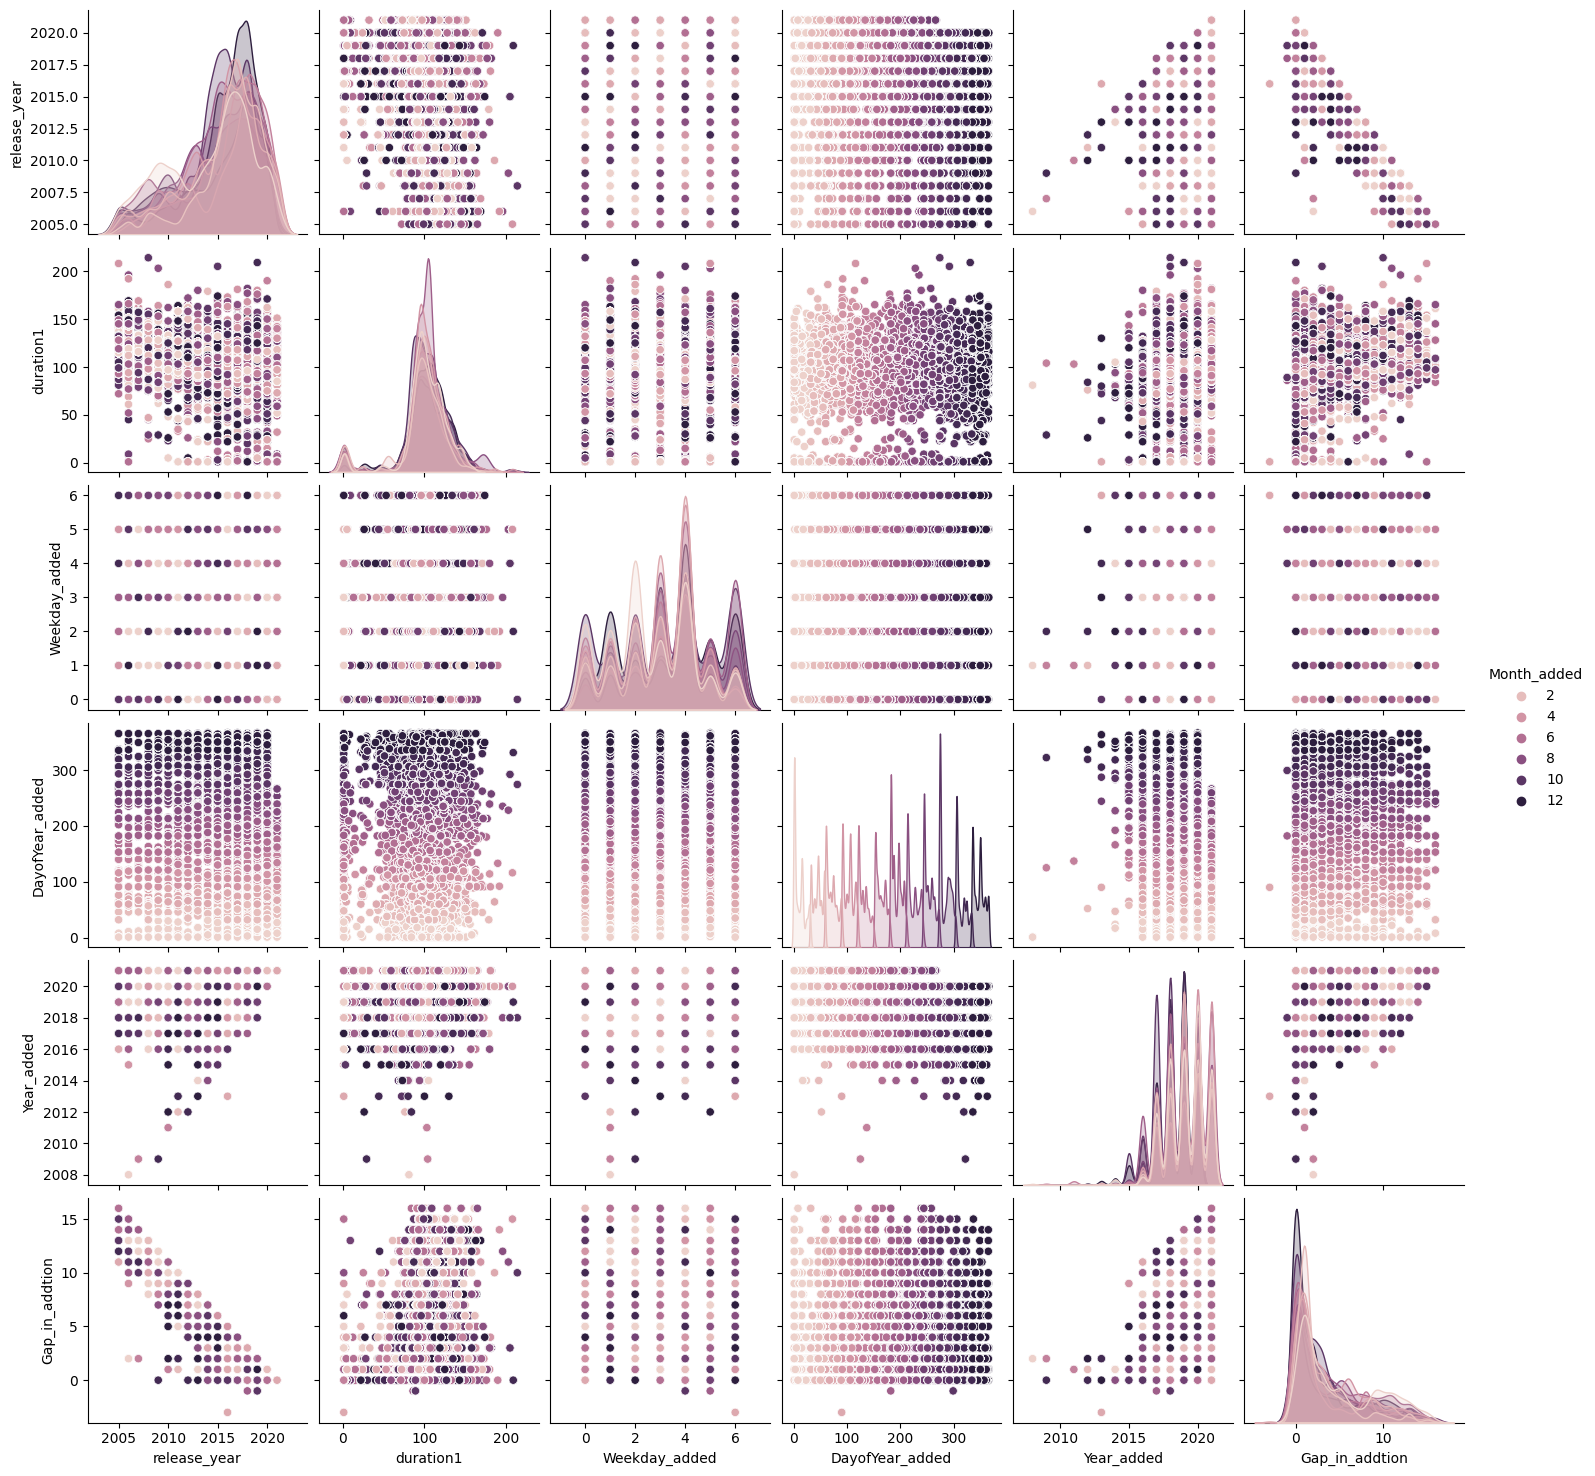

In [72]:
sns.pairplot(df, hue = 'Month_added')
plt.show()

Month needed to be in categorical form instead of continuous variable.

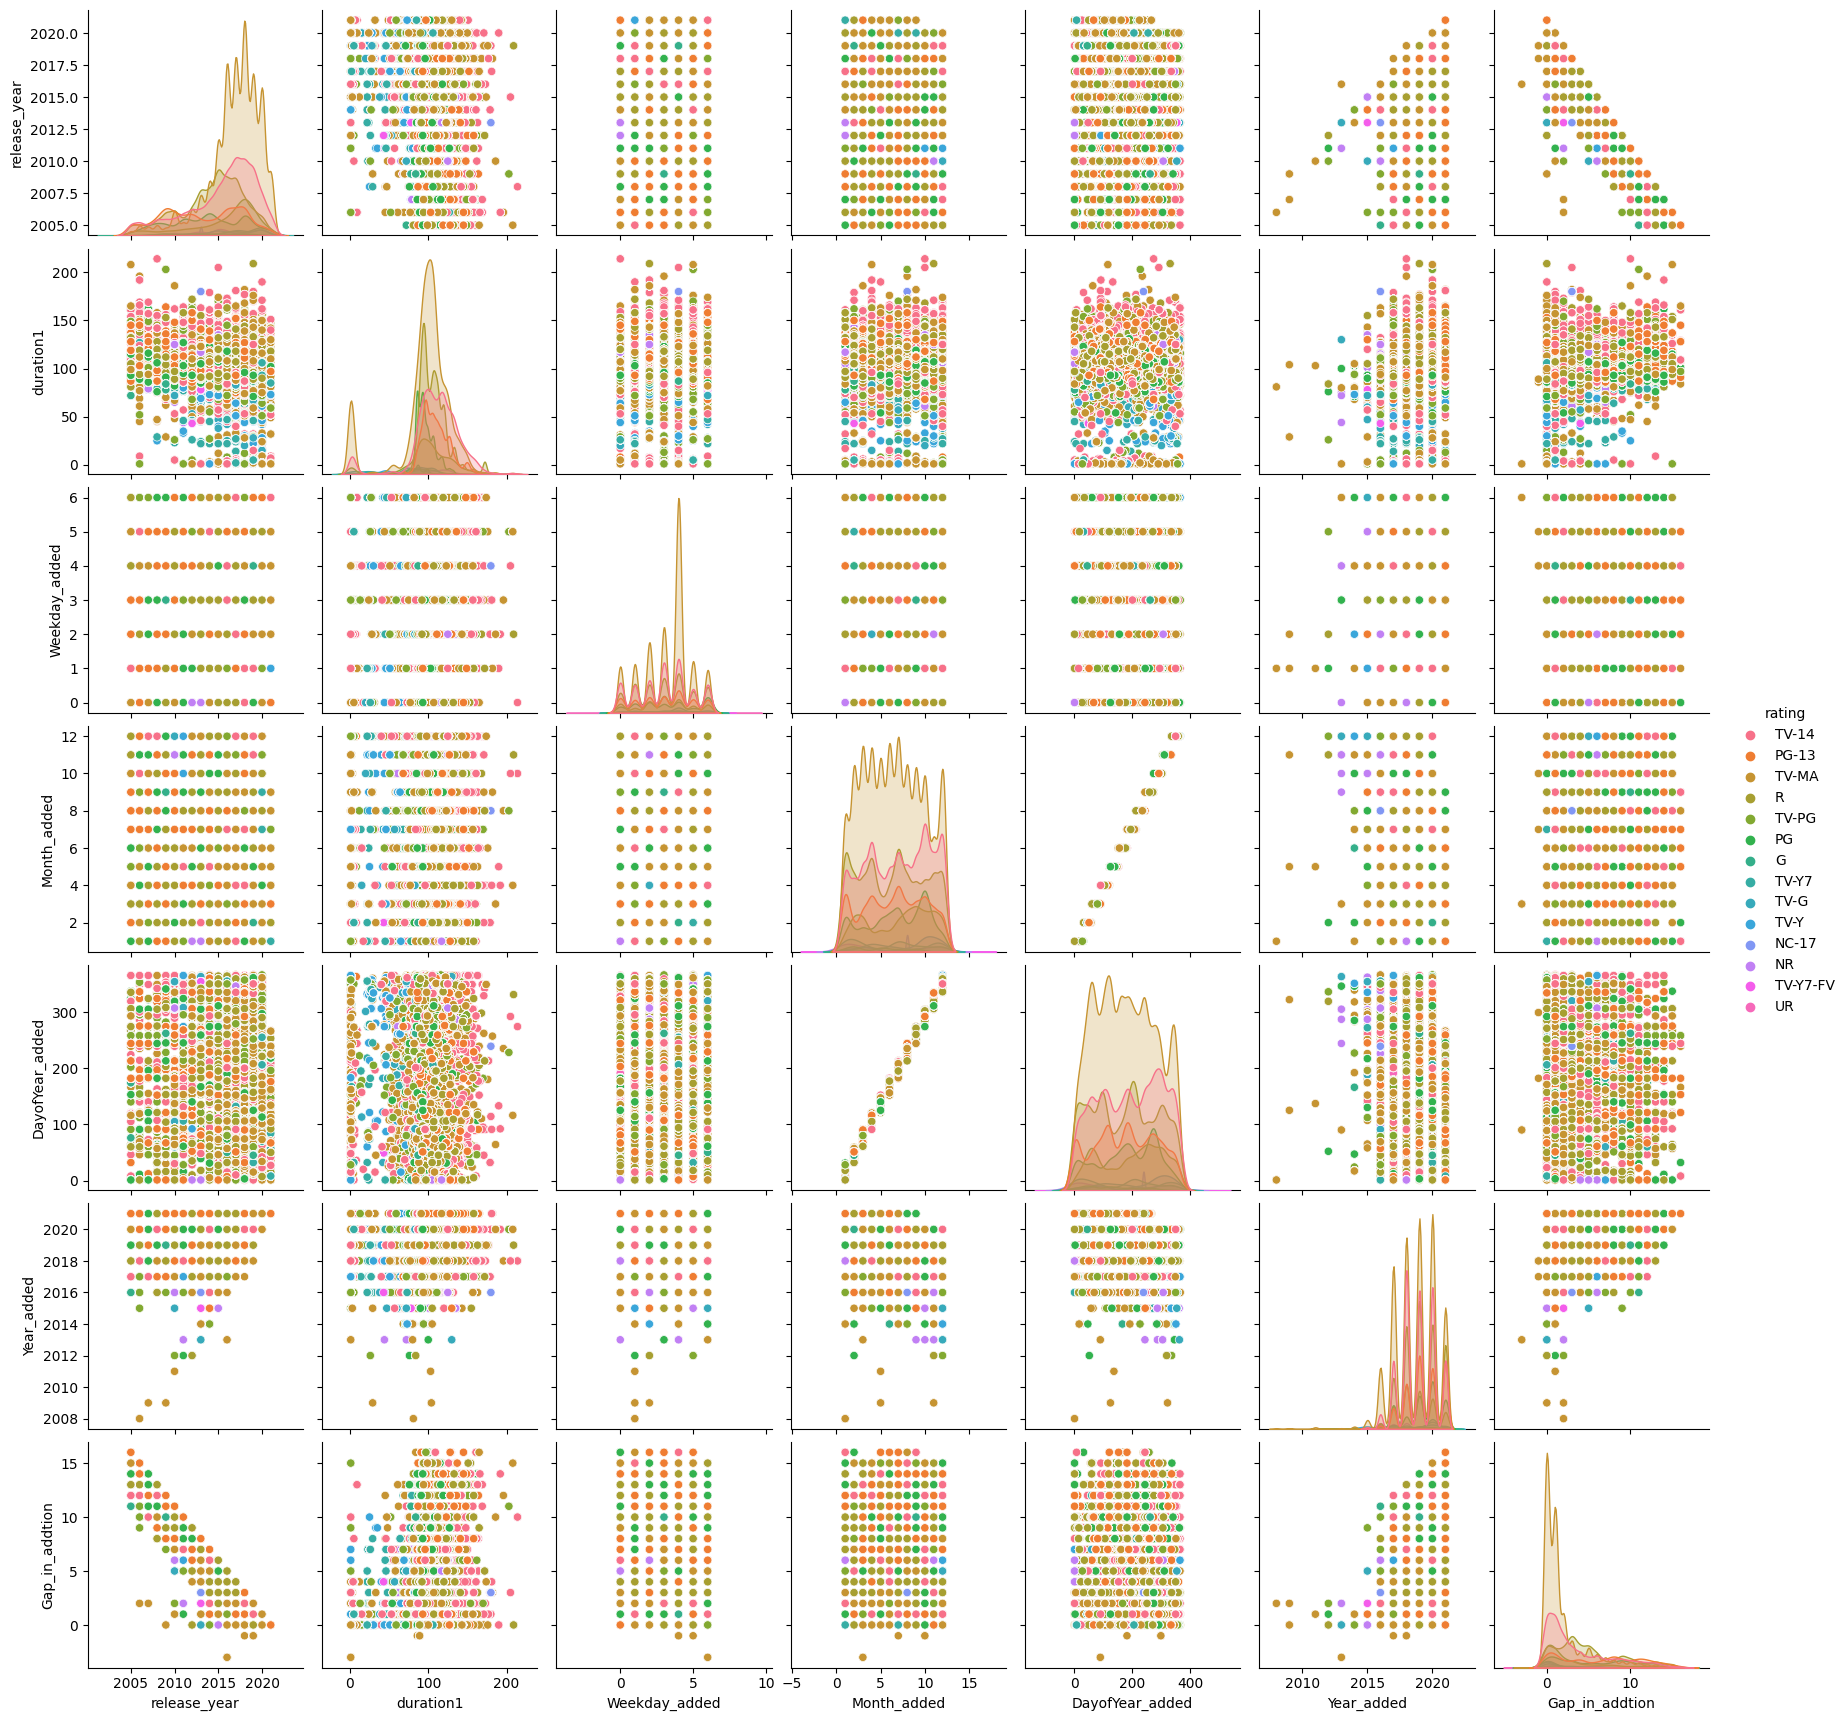

In [73]:
sns.pairplot(df, hue = 'rating')
plt.show()

More inferences could have been created with a better powerful device.